## <a id="problem_statement_6"><b>LAB7 RNNs</b></a>
# Lab Assignment Seven: Recurrent Network Architecturess- Problem Statement

## Available: Nov 28, 2023 11:59pm
## Due Date: Dec 13, 2023 11:59pm at HH:MM AM

### Data Scientist
- [Ben Brock](benbroc@gmail.com.com=project)
- [Cameron Jonathan Ervin](cjervin@smu.edu=project)
- [Jonathan Daniel Hunnicutt](jdhunnicutt@smu.edu=project)
- [MohammadAli Ezzati](ez@smu.edu=project)

### <a href="#TOC_6">TOP</a>


### Objective:
In this lab, you will select a prediction task to perform on your dataset, evaluate a deep learning architecture and tune hyper-parameters. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.
    
### Dataset Selection
Select a dataset that is text. That is, the dataset should be text data (or a time series sequence). In terms of generalization performance, it is helpful to have a large dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification can be "many-to-one" or "many-to-many" sequence classification, whichever you feel more comfortable with. 

    
### Best Practices for Notebook: 
* The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish in a sequential manner before submission.
* It is preferable to remove all warnings and errors before submission.
* The notebook should be submitted as an HTML file (.html) and as a notebook file (*.ipynb)
    
    
### Submisssion Guidelines

1. The submission should be a well-commented notebook [format - .html]
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks.
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.
4. Submission will not be evaluated if
   1. it is submitted post-deadline, or,
   2. more than 1 file is submitted.

    
### <a href="#TOC_6">TOP</a>
    
### <a href="#problem_statement_6">LAB7 : Problem Statement</a>

## <a id="detailed_grading_rubric_7">**LAB7 Detailed Grading Rubric**</a>

## Detailed LAB Assignment Seven, "Recurrent Network Architectures", Grading Rubric

## **Grading Rubric**
- **Preparation (3.0 points total)**
   - <b>[2.0 points]</b> Define and prepare your data set. Provide details about the source of the data.<b>Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.</b>  Also discuss your <b>rationale for the size and nature of your vocabulary.</b>
   - <b>[0.5 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate </b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
  - <b>[0.5 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Convince me that your  train/test method is a realistic mirroring of how an algorithm would be used in practice.
<p>
<p>
- **Modeling  (6.0 points total)**
    - <b>[2.0 points]</b> Investigate at <b>least two different recurrent network architectures.</b>  Be sure to <b>use an embedding layer.</b> Adjust hyper-parameters of the networks as needed to improve generalization performance <b>(train a total of at least four models).</b> Discuss the performance of each network and compare them. <b>Justify your choice of parameters for each.</b>
    - <b>[1.0 points]</b> Use the <b>Glove pre-trained embedding.</b> Provide justification of the embedding size.
    - <b>[1.0 points]</b> Using the best parameters and architecture from the RNN in the previous step, <b>add a second recurrent chain to your RNN.</b> The input to the second chain should be the output sequence of the first chain. Visualize the performance of training and validation sets versus the training iterations. 
  - <b>[0.5 points]</b> Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab.
  - <b>[0.5 points]</b> Run to convergence.
  - <b>[1.0 points]</b> <b>Visualize the results of all the RNNs you trained.</b>
<p>
<p>
- **Exceptional Work (1 points total)**
    - You have free reign to provide additional analyses. 
    - Research and use the ConceptNet, Numberbatch embedding and compare to GloVe. Which method is better for your specific application? 
    - (2nd GRU). Alternatively, you may also choose one recurrent network and one convolutional network.
    

### <a href="#TOC_6">TOP</a>
    
### <a href="#problem_statement_6">LAB7 : Problem Statement</a>

In [2]:
import scipy.stats as stats
from scipy.stats import iqr
import numpy as np

def custom_stats_information(value, df):
    
    '''
    custom_stats_information Helper Function
    
    parameter1 : value - DataFrame column name 
    parameter2 : df - DataFrame name
    
    Will print a summary of the following list of values below:
    - min
    - max
    - mean
    - median
    - std
    - mode
    - skew
    - IQR = Q3 - Q1
    - lower_outlier_gate_water_mark
    - upper_outlier_gate_water_mark
    - Q1 - 25%
    - Q2 - 50%  ==> median
    - Q3 - 75%
    
    **Summary of Skewness**
    - mean = median = mode --> symmetric
    - mean > median > mode --> positive skewed RIGHT
    - mean < median < mode --> negative skewed LEFT
    '''
    mode = list(df[value].mode())
    num_items_in_list = len(mode)
    
    q3 = np.quantile(df[value], 0.75)
    q1 = np.quantile(df[value], 0.25)
    q2_50 = np.quantile(df[value], 0.50)
    
    iqr = q3 - q1
    
    # Q3 + 1.5 * IQR: upper outlier gate
    upper_outlier_water_mark_whisker = q3 + 1.5*iqr
    
    # Q1 - 1.5 * IQR: lower outlier gate
    lower_outlier_water_mark_whisker = q1 - 1.5*iqr
    
    if num_items_in_list == 1:
        print('{} has mode value: {}'.format(value, mode[0]))
    else:
        print('{} has multi-mode value: {}'.format(value, num_items_in_list))
        
        
    print("{} min value is {:.2f}\n"
       "{} max value is {:.2f}\n"
       "{} mean value is {:.2f}\n"
       "{} median value is {:.2f}\n"
       "{} std value is {:.2f}\n"
       "{} mode value is {:.2f}  mode items {}\n"
       "{} skew value is {:.2f}\n"
       "{} IQR value is {:.2f}\n"
       "{} Lower outlier gate value is {:.2f}\n"
       "{} Outer outlier gate value is {:.2f}\n"
       "{} Q1_25 value is {:.2f}\n"
       "{} Q_50 value is {:.2f}\n"
       "{} Q3_75 value is {:.2f}".format(value,
                                    df[value].min(),
                                    value,
                                    df[value].max(),
                                    value, 
                                    df[value].mean(),
                                    value,
                                    df[value].median(),
                                    value,
                                    df[value].std(),
                                    value,
                                    num_items_in_list, mode,
                                    value,
                                    df[value].skew(),
                                    value,
                                    iqr,
                                    value,
                                    lower_outlier_water_mark_whisker,
                                    value,
                                    upper_outlier_water_mark_whisker,
                                    value,
                                    q1,
                                    value,
                                    q2_50,
                                    value,
                                    q3))

In [3]:
# function to plot a boxplot and a histogram along the same scale.

"""
Code re-used from the Great Learning Data Science bootcamp
This sort_values_labeled_barplot is such a useful, I decided to 
keep in with my list of Data Science Data Visualization toolkit.
"""

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    
    Author:  Great Learning Data Science
    Date:    1/2022
    
    input parameters
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    
    return:
    None
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [4]:
# function to create labeled barplots with sorted values

"""
Code re-used from the Great Learning Data Science bootcamp
This sort_values_labeled_barplot is such a useful, I decided to 
keep in with my list of Data Science Data Visualization toolkit.
"""

def sort_values_labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top of each value going but with the ordering
    from high to low

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    
    Author:  Great Learning Data Science
    Date:    1/2022
    
    input 
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    
    return:
    None
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def sort_values_labeled_barplot_top_values(data, feature, perc=False, n=10):  # Set the default value of n to 10
    """
    Barplot with percentage at the top of each value, sorted from high to low.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is 10)
    
    Author: Great Learning Data Science
    Date: 1/2022
    
    input 
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is 10)
    
    return:
    None
    """

    total = len(data[feature])  # length of the column
    plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    
    # Sort the data based on the value counts and select the top n values
    ordered_data = data[feature].value_counts().index[:n]
    
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=ordered_data)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    
    plt.show()

# Example usage:
# sort_values_labeled_barplot(your_data, "your_feature")


### <a href="#TOC_6">TOP</a>

### <a href="#problem_statement_6">LAB7 : Problem Statement</a>

### <a href="#TOC_6">TOP</a>

### <a href="#problem_statement_6">LAB7 : Problem Statement</a>

<a id="TOC_6"></a>
# Table of Contents

## Scoring guide (Rubric) -  Lab Assignment Seven: Recurrent Network Architectures

## <a href="#understand_structure_of_data_6">1 -Preparation </a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Preparation (<b>3.0 points total</b>)</h3>
    <ul>
        <li><b>[2.0 points]</b> Define and prepare your data set. Provide details about the source of the data. <b>Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence.</b>  Also discuss your <b>rationale for the size and nature of your vocabulary.</b></li>
        <li><b>[0.5 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a <b>detailed argument for why this (these) metric(s) are appropriate </b> on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.</li>
        <li><b>[0.5 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Convince me that your train/test method is a realistic mirroring of how an algorithm would be used in practice. </li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

## <a href="#univariate_data_analysis_6">2 - Modeling <b>(6 points total)</b></a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Modeling (<b>6 points total</b>)</h3>
    <ul>
        <li><b>[2.0 points]</b> Investigate at <b>least two different recurrent network architectures.</b>  Be sure to <b>use an embedding layer.</b> Adjust hyper-parameters of the networks as needed to improve generalization performance <b>(train a total of at least four models).</b> Discuss the performance of each network and compare them. <b>Justify your choice of parameters for each.</b> </li>
        <li><b>[1.0 points]</b> Use the <b>Glove pre-trained embedding.</b> Provide justification of the embedding size.</li>
        <li><b>[1.0 points]</b> Using the best parameters and architecture from the RNN in the previous step, <b>add a second recurrent chain to your RNN.</b> The input to the second chain should be the output sequence of the first chain. Visualize the performance of training and validation sets versus the training iterations. </li>
        <li><b>[0.5 points]</b> Run to convergence.</li>
        <li><b>[0.5 points]</b> Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab.</li>
        <li><b>[1.0 points]</b> Visualize the results of all the RNNs you trained.</li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

## <a href="#multivariate_data_analysis_6">3 - Exceptional Work <b>(1 points total)</b></a> 
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Exceptional Work(<b>1 point total</b>)</h3>
    <ul>
        <li>You have free reign to provide additional analyses</li>
        <li>Research and use the ConceptNet, Numberbatch embedding and compare to GloVe. Which method is better for your specific application? </li>
        <li>(2nd GRU). Alternatively, you may also choose one recurrent network and one convolutional network. </li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

## <a href="#quality_use_of_visualizations">4 - Quality & Use of Visualizations</a>
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Quality & Use of Visualizations </h3>
    <ul>
        <li>The details in Visualization used.</li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

## <a href="#conclusion_and_key_takeaways">5 - Conclusion and Recommendations</a>

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Conclusion and Recommendations</h3>
    <ul>
        <li>Conclude with the key insights/observations</li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

<a id="notebook_overall"></a>
## 6 - Well Commented Python Code
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Well Commented Python Code </h3>
    <ul>
        <li>Structure and flow</li>
        <li>Well commented code</li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

<a id="understand_structure_of_data_6"></a>
## Preparation - Grading Rubric

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Preparation (<b>3.0 points total</b>)</h3>
    <ul>
        <li><b>[1.5 points]</b> Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.</li>
        <li><b>1.5 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. </li>
    </ul>
</div>

### <a href="#TOC_6">TOP</a>

## Load and overview the dataset

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

Loading the data into python to explore and understand it.

- You MUST address
  - **Reference "Understanding the structure of the data" item requirements listed in the grading rubric to earn the maximum score**
  - overview of the dataset shape and datatypes
  - statistical summary and shape
  - check for missing values

## Reference notebooks
- https://www.kaggle.com/code/reshmikad/sentiment-analysis-for-amazon-reviews
- https://www.kaggle.com/code/anantpandey29/cudnngru-rnn-based-sentiment-analysis
- https://www.kaggle.com/code/mdtamzidulislam/learn-data-sceince-from-github
- https://www.kaggle.com/code/daviderendina/deeplearning-projectcs
- https://www.kaggle.com/code/aaroha33/sentiment-analysis-with-amazon-reviews
- https://github.com/eclarson/MachineLearningNotebooks/blob/master/13.%20RNN%20Basics.ipynb
- https://github.com/eclarson/MachineLearningNotebooks/blob/master/14.%20ConceptNet.ipynb

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [7]:
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Good Genre Datasets

In [9]:
# Load the Good Genre Dataset
christianity_good_user_reviews_df = pd.read_csv('christianity_good_user_reviews.csv')
christianity_good_user_reviews = christianity_good_user_reviews_df.copy()

mh_good_user_reviews_df = pd.read_csv('mental_health_good_user_reviews.csv')
mh_good_user_reviews = mh_good_user_reviews_df.copy()

specialized_diets_good_user_reviews_df = pd.read_csv('specialized_diets_good_user_reviews.csv')
specialized_diets_good_user_reviews = specialized_diets_good_user_reviews_df.copy()

sports_good_user_reviews_df = pd.read_csv('sport_and_outdoors_good_user_reviews.csv')
sports_good_user_reviews = sports_good_user_reviews_df.copy()

## Load the Bad Genre Datasets

In [10]:
# Load the Bad Genre Dataset
christianity_bad_user_reviews_df = pd.read_csv('christianity_bad_user_reviews.csv')
christianity_bad_user_reviews = christianity_bad_user_reviews_df.copy()

mh_bad_user_reviews_df = pd.read_csv('mental_health_bad_user_reviews.csv')
mh_bad_user_reviews = mh_bad_user_reviews_df.copy()

specialized_diets_bad_user_reviews_df = pd.read_csv('specialized_diets_bad_user_reviews.csv')
specialized_diets_bad_user_reviews = specialized_diets_bad_user_reviews_df.copy()

sports_bad_user_reviews_df = pd.read_csv('sport_and_outdoors_bad_user_reviews.csv')
sports_bad_user_reviews = sports_bad_user_reviews_df.copy()

In [11]:
mh_good_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      5152 non-null   object 
 1   RATING                  5152 non-null   float64
 2   corpus text             5151 non-null   object 
 3   normalized corpus text  5152 non-null   object 
dtypes: float64(1), object(3)
memory usage: 161.1+ KB


In [12]:
mh_good_user_reviews.dtypes

ID                         object
RATING                    float64
corpus text                object
normalized corpus text     object
dtype: object

In [13]:
mh_good_user_reviews[['ID', 'RATING', 'corpus text']].head()

,ID,RATING,corpus text
0,R7THWDGIRB0UY,5.000,I am really enjoying using ACT techniques with...
1,R3ODY8HOZ9DP8L,5.000,Great guide!
2,R1MVHDMFWPWWGP,5.000,Very thorough treatment of a complex but helpf...
3,R2FNCL5WOO28FR,5.000,"Perfect overview, introduction"
4,R2YCSZX6SX8WZH,4.000,Includes all necessary information to learn sk...


In [14]:
mh_good_user_reviews[['ID', 'RATING', 'corpus text']].tail()

,ID,RATING,corpus text
5147,RMK46SB9QRZWE,5.000,Astute introduction to ACT and comprehensive a...
5148,RWA8SCTQCX6OH,4.000,Once you get through the dry theory of ACT (fi...
5149,R7REG3KTM9L5D,5.000,Awesome clinical resource. I use it frequently...
5150,R31CNRJM3XZN4Q,5.000,"Folks, this is an absolute must-read for anyon..."
5151,R60Q8ILBR0Y9I,4.000,"This is a thorough and technical book, with ex..."


In [15]:
mh_good_user_reviews[['ID', 'RATING', 'corpus text']].sample(20)

,ID,RATING,corpus text
2601,RSO60XO8HZ8J1,5.000,"Easy to read , easy to understand...This is an..."
4215,R2R14KBAOZ5PED,4.000,I bought this book based upon a short YouTube ...
4043,R4OAGQZH2LXEH,5.000,You have created a wonderful e-book and it wil...
3450,RSZPUB27WSVB1,5.000,good info
367,R2UG7UGJTF3OYD,5.000,I am reading several Alzheimer's books as a ca...
2516,R173KNJMZ8LO6C,5.000,I read the book before conducting a cover inte...
4769,R2VBSY7IZG8ZMC,5.000,Very satisfied with my purchased!! The arrival...
3405,R1M2B8QTSDSNJR,5.000,If you're looking for an accessible foundatio...
3505,R99CL509JKU6Y,5.000,I got this book from a girl I was in a bad re...
4667,R217B41T98LP83,5.000,Good text books. Very well organized and has r...


## Drop Normalized Data Column 

In [16]:
christianity_good_user_reviews = christianity_good_user_reviews.drop(['normalized corpus text'], axis = 1)
mh_good_user_reviews = mh_good_user_reviews.drop(['normalized corpus text'], axis = 1)
specialized_diets_good_user_reviews = specialized_diets_good_user_reviews.drop(['normalized corpus text'], axis = 1)
sports_good_user_reviews = sports_good_user_reviews.drop(['normalized corpus text'], axis = 1)

In [17]:
mh_good_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5152 non-null   object 
 1   RATING       5152 non-null   float64
 2   corpus text  5151 non-null   object 
dtypes: float64(1), object(2)
memory usage: 120.9+ KB


In [18]:
mh_good_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5152 non-null   object 
 1   RATING       5152 non-null   float64
 2   corpus text  5151 non-null   object 
dtypes: float64(1), object(2)
memory usage: 120.9+ KB


In [19]:
mh_good_user_reviews.head()

,ID,RATING,corpus text
0,R7THWDGIRB0UY,5.000,I am really enjoying using ACT techniques with...
1,R3ODY8HOZ9DP8L,5.000,Great guide!
2,R1MVHDMFWPWWGP,5.000,Very thorough treatment of a complex but helpf...
3,R2FNCL5WOO28FR,5.000,"Perfect overview, introduction"
4,R2YCSZX6SX8WZH,4.000,Includes all necessary information to learn sk...


In [20]:
mh_bad_user_reviews = mh_bad_user_reviews.drop(['normalized corpus text'], axis = 1)
christianity_bad_user_reviews = christianity_bad_user_reviews.drop(['normalized corpus text'], axis = 1)
specialized_diets_bad_user_reviews = specialized_diets_bad_user_reviews.drop(['normalized corpus text'], axis = 1)
sports_bad_user_reviews = sports_bad_user_reviews.drop(['normalized corpus text'], axis = 1)

In [21]:
mh_bad_user_reviews.RATING.value_counts()

RATING
1.000    557
2.000    496
0.500      1
Name: count, dtype: int64

In [22]:
christianity_bad_user_reviews.RATING.value_counts()

RATING
1.000    631
2.000    495
0.500      5
Name: count, dtype: int64

In [23]:
specialized_diets_bad_user_reviews.RATING.value_counts()

RATING
1.000    646
2.000    599
0.500      6
Name: count, dtype: int64

In [24]:
sports_bad_user_reviews.RATING.value_counts()

RATING
1.000    514
2.000    441
0.500      6
Name: count, dtype: int64

## <b>Book User Reviews Data Dictionary</b>

|**Feature**|**Description**|**Data Type**|
|:-----|:--------|:----------|
| | ||
|**ID**|customer unique user anonymized ID. |string or object||
|**RATING**|user review rating on a scale of 1 to 5 of the book: (1) >= 4 is positive or good user review, (2) <= 2  is negative or bad user review, (3) 3 is neutral |float64|
|**corpus text**|customer user review free text|string or object||
|**sentiment**|positive ( RATING >= 4), negative ( RATING <= 2)|string or object|
|**genre**|genre or book category/industry where the book is sourced from.  In our case: (1) Christianity, (2) Mental Health, (3) Specialized Diets, (4) Sports and Outdoors |string or object|
|**max_length**| the max length of number of words in the customer's user review. Once we know what the understanding of the distribution of user reviews word lengths are, we can determine the max length of the user reviews in terms of words. (1) XXX = pad_sequences(sequences, maxlen=MAX_ART_LEN) or (2) MAX_ART_LEN = 1000 # maximum and minimum number of words|int64 |


## Feature Engineering

## Save the Sentiment for each User Review

In [25]:
df_list = [christianity_good_user_reviews, mh_good_user_reviews, specialized_diets_good_user_reviews, sports_good_user_reviews,
           christianity_bad_user_reviews, mh_bad_user_reviews, specialized_diets_bad_user_reviews, sports_bad_user_reviews]

for df in df_list:
    df['sentiment']=["positive" if x>=4 else "negative" for x in df['RATING']]

## Save the Book User Review Genre

In [26]:
christianity_good_user_reviews["genre"] = "christianity"
christianity_bad_user_reviews["genre"] = "christianity"

mh_good_user_reviews["genre"] = "mental_health"
mh_bad_user_reviews["genre"] = "mental_health"

specialized_diets_good_user_reviews["genre"] = "specialized_diets"
specialized_diets_bad_user_reviews["genre"] = "specialized_diets"

sports_good_user_reviews["genre"] = "sports_and_outdoors"
sports_bad_user_reviews["genre"] = "sports_and_outdoors"

specialized_diets_good_user_reviews["genre"] = "specialized_diets"
specialized_diets_bad_user_reviews["genre"] = "specialized_diets"

In [27]:
christianity_good_user_reviews.head()

,ID,RATING,corpus text,sentiment,genre
0,R1QJW54NJAHQVC,4,Bussey makes it clear that rapprochement betwe...,positive,christianity
1,R2XQTH1B4UFWKI,4,Mr. Bussey manages to merge the study of Astro...,positive,christianity
2,R6O5LHN306AY1,4,Peter Bussey is a particle physicist with a Ph...,positive,christianity
3,R1TDBISDT7UN9P,4,The initial chapters in the book give a summar...,positive,christianity
4,R18A171XJGSR9J,5,great read!,positive,christianity


In [28]:
mh_good_user_reviews.head()

,ID,RATING,corpus text,sentiment,genre
0,R7THWDGIRB0UY,5.000,I am really enjoying using ACT techniques with...,positive,mental_health
1,R3ODY8HOZ9DP8L,5.000,Great guide!,positive,mental_health
2,R1MVHDMFWPWWGP,5.000,Very thorough treatment of a complex but helpf...,positive,mental_health
3,R2FNCL5WOO28FR,5.000,"Perfect overview, introduction",positive,mental_health
4,R2YCSZX6SX8WZH,4.000,Includes all necessary information to learn sk...,positive,mental_health


In [29]:
mh_bad_user_reviews.head()

,ID,RATING,corpus text,sentiment,genre
0,R3NYWB8AT2X0IP,1.000,First time I have ever posted a negative revie...,negative,mental_health
1,R2U03ZC2H7E8PZ,2.000,"Sigh. I generally learn best through reading,...",negative,mental_health
2,R2SSYZ1R5N0QF4,2.000,I'm not a particularly good book learner so I'...,negative,mental_health
3,RHS0W0FX3S7WS,1.000,Not useful. Gratuitously verbose. Could easi...,negative,mental_health
4,RU6BH5RLTAR24,1.000,As an ACT therapist specializing in treating ...,negative,mental_health


In [30]:
mh_bad_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1054 non-null   object 
 1   RATING       1054 non-null   float64
 2   corpus text  1054 non-null   object 
 3   sentiment    1054 non-null   object 
 4   genre        1054 non-null   object 
dtypes: float64(1), object(4)
memory usage: 41.3+ KB


In [31]:
mh_good_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5152 non-null   object 
 1   RATING       5152 non-null   float64
 2   corpus text  5151 non-null   object 
 3   sentiment    5152 non-null   object 
 4   genre        5152 non-null   object 
dtypes: float64(1), object(4)
memory usage: 201.4+ KB


## Combine or Concatenate all of the DataFrames

In [32]:
import pandas as pd

# Assuming mh_bad_user_reviews and mh_good_user_reviews are your DataFrames

# Concatenate the DataFrames vertically
final_df = pd.concat(df_list, ignore_index=True)

# Display information about the final DataFrame
final_df.info()

# Display the shape of the final DataFrame
print("Shape of final_df:", final_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           25408 non-null  object 
 1   RATING       25408 non-null  float64
 2   corpus text  25407 non-null  object 
 3   sentiment    25408 non-null  object 
 4   genre        25408 non-null  object 
dtypes: float64(1), object(4)
memory usage: 992.6+ KB
Shape of final_df: (25408, 5)


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           25408 non-null  object 
 1   RATING       25408 non-null  float64
 2   corpus text  25407 non-null  object 
 3   sentiment    25408 non-null  object 
 4   genre        25408 non-null  object 
dtypes: float64(1), object(4)
memory usage: 992.6+ KB


In [34]:
final_df.sentiment.value_counts()

sentiment
positive    21011
negative     4397
Name: count, dtype: int64

In [35]:
# Assuming final_df is your DataFrame
final_df["max_length"] = final_df["corpus text"].apply(lambda x: len(str(x).split()))

In [36]:
# Display the maximum length
max_length = final_df["max_length"].max()
print(f"The maximum length in 'corpus text' is: {max_length} words.")

The maximum length in 'corpus text' is: 3561 words.


In [37]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RATING,25408.000,4.234,1.334,0.500,4.000,5.000,5.000,5.000
max_length,25408.000,77.932,133.620,0.000,16.000,38.000,89.000,3561.000


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           25408 non-null  object 
 1   RATING       25408 non-null  float64
 2   corpus text  25407 non-null  object 
 3   sentiment    25408 non-null  object 
 4   genre        25408 non-null  object 
 5   max_length   25408 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [39]:
final_df.head()

,ID,RATING,corpus text,sentiment,genre,max_length
0,R1QJW54NJAHQVC,4.000,Bussey makes it clear that rapprochement betwe...,positive,christianity,50
1,R2XQTH1B4UFWKI,4.000,Mr. Bussey manages to merge the study of Astro...,positive,christianity,72
2,R6O5LHN306AY1,4.000,Peter Bussey is a particle physicist with a Ph...,positive,christianity,1767
3,R1TDBISDT7UN9P,4.000,The initial chapters in the book give a summar...,positive,christianity,192
4,R18A171XJGSR9J,5.000,great read!,positive,christianity,2


In [40]:
final_df.tail()

,ID,RATING,corpus text,sentiment,genre,max_length
25403,R2690T2EZ8LUVN,1.000,What a great read for Christians everywhere. e...,negative,sports_and_outdoors,215
25404,RZWH96918QR7Z,2.000,The only other book I have read that is simila...,negative,sports_and_outdoors,113
25405,R1VI6RAP7UIG4I,1.000,This book is worthless and contains no real tr...,negative,sports_and_outdoors,22
25406,RU0NT1AD2GOGQ,2.000,I did not get that much out of this book. Kind...,negative,sports_and_outdoors,19
25407,RM7NV9FZ7NGK9,2.000,I did get some good information however I want...,negative,sports_and_outdoors,15


In [41]:
final_df.sample(10)

,ID,RATING,corpus text,sentiment,genre,max_length
12620,RUWKC31DHB6GC,4.000,Informatve. Great ideas for the low carb lifes...,positive,specialized_diets,12
21722,R3MJY2VGW7JAZ6,1.000,There are many deceptive books dealing with co...,negative,christianity,176
20211,R3RVUMIG1IK8LV,5.000,"Bought this as a gift for my dad, who is a big...",positive,sports_and_outdoors,49
10994,R2M82BWZGAUW04,5.000,I use this woe concurrently with a LC lifestyl...,positive,specialized_diets,34
22703,R1UWBWQ7SG5Q60,1.000,I first picked up a copy of the book not long ...,negative,mental_health,517
3534,R1JBKD4DNMKGKL,5.000,Thank you.,positive,christianity,2
10650,RVY0XNWKWS8T1,4.000,I recommend renting a book rather than buying....,positive,mental_health,34
13197,R1QA9Y9EGDAALI,5.000,I LOVE this book!! I am older (77) and don't ...,positive,specialized_diets,144
19367,R1SLQBQ08TV8KJ,5.000,"All over the world, countries and cities think...",positive,sports_and_outdoors,122
14034,R1OKW6B0QHY9QX,5.000,Great shape and has some interesting recipes,positive,specialized_diets,7


## EDA (Exploratory Data Analysis) of max_length ONLY

- Ideally, we should set the max_length value to 3561 to max_padding_length (or max_sequence_length).
- If this is done, it would tremendously slow down the fitting process.  At the same, we may be truncating data which could be bad for the classifier
- I highly recommend that we set the max_sequence_length to 3561 in order that we do not truncate data.
- This is tied to the pad sequences or the MAX_ART_LENGTH.
- I found that when using a CNN, the most optimal value was between 200 to 500 words to obtain the maximum f1_score weighted metric score.
  - XXX = pad_sequences(sequences, maxlen=MAX_ART_LEN)
  - MAX_ART_LEN = 1000 # maximum and minimum number of words

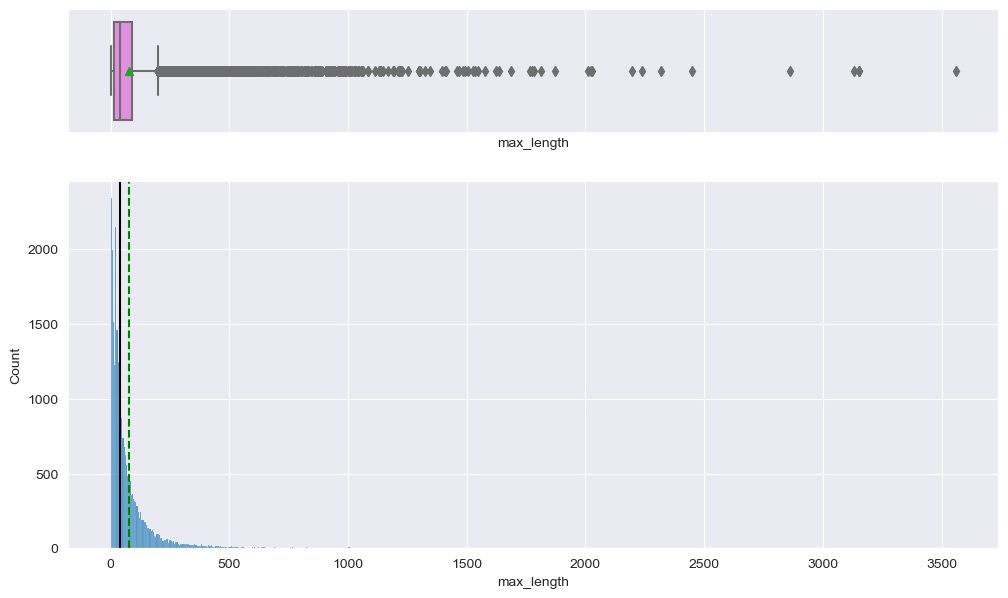

In [42]:
histogram_boxplot(final_df, "max_length")

In [43]:
custom_stats_information("max_length", final_df)

max_length has mode value: 2
max_length min value is 0.00
max_length max value is 3561.00
max_length mean value is 77.93
max_length median value is 38.00
max_length std value is 133.62
max_length mode value is 1.00  mode items [2]
max_length skew value is 7.27
max_length IQR value is 73.00
max_length Lower outlier gate value is -93.50
max_length Outer outlier gate value is 198.50
max_length Q1_25 value is 16.00
max_length Q_50 value is 38.00
max_length Q3_75 value is 89.00


In [44]:
final_df["max_length"].describe()

count   25408.000
mean       77.932
std       133.620
min         0.000
25%        16.000
50%        38.000
75%        89.000
max      3561.000
Name: max_length, dtype: float64

**Observations**

* "max_length" is heavily right skewed (value = 7.27).
* There are outliers in the distribution.
* From boxplot we can see that the third quartile (Q3) is equal to 89.00 which means 75% of values in the distribution have "max_length" values that are below 89.00.
* The median "max_length" is 38.00 and the average "max_length" is 38.00
* min value : 0.00 , max value : 3561.00
* As you can see, the max_length value is related to the length of user reviews is 3561. 
  - If you set the value of max_sequence_length to 3561, this would mean it would take approximately 2 hours+ per epoch for the training time.
  - Goal is to run the notebook on the HPC cluster.  If not, there is no way to get the lab done in time before the due date.

In [45]:
final_df[final_df["max_length"] > 1700].head()

,ID,RATING,corpus text,sentiment,genre,max_length
2,R6O5LHN306AY1,4.000,Peter Bussey is a particle physicist with a Ph...,positive,christianity,1767
2793,R1BC2KUNSSIE8W,4.000,"The nature, outline and purpose of McGrath's n...",positive,christianity,2317
3062,R2YP1667CC2BMC,4.000,Since terms used in eschatology(the doctrine o...,positive,christianity,1873
3086,R30ABW6YDNAIKE,5.000,Alvin Plantinga is arguably the most significa...,positive,christianity,1774
3117,R1EQUKJC4E00FU,5.000,"Simply put, this book is an exposition of 2 Ti...",positive,christianity,3152


### Review the Long Lengthy User Reviews

In [46]:
final_df.loc[2, "corpus text"]

'Peter Bussey is a particle physicist with a Ph.D. from Cambridge.  In Signposts to God, Bussey argues that modern physics is either compatible with Christian theism or points to a creator.\n\nThis review will go through each chapter, commenting on select points.  It will not be a comprehensive review, but it will hopefully provide readers with a taste of what the book is like, and what I consider to be its strengths and weaknesses.  I should add the disclaimer that I am not a scientist.\n\nChapter 1 is the introduction.  Here, Bussey criticizes physicalism.  Physicalism appears to be similar to materialism, a view that excludes the spiritual by saying that matter is all that there is.  According to Bussey, humans have a sense that life includes more than the material, or physical.\n\nChapter 2, “The World of Physics: A Quick Tour,” talks about basic aspects of physics: force, gravitation, electricity and magnetism, light, heat, and atoms.  This chapter also has a section on the “God p

In [47]:
final_df.loc[3117, "corpus text"]

'Simply put, this book is an exposition of 2 Timothy 3:1-4:8. In this passage of Scripture, the apostle Paul is warning his young disciple Timothy of the onslaught of false teachers that would plague the church during the intermediate period between Christ\'s resurrection and second coming. He, in classical Pauline fashion, presents the problem and then fleshes out the practical implications towards a holistic ministry approach in the midst of such vile danger.\n\nThe book is divided into 5 chapters:\n\n1. Living in the last days [2 Timothy 3:1-9]\n2. Hold the right mentors in high regard [2 Timothy 3:10-11]\n3. Hold few illusions about the world [2 Timothy 3:12-13]\n4. Hold on to the Bible [2 Timothy 3:14-17]\n5. Hold out the Bible to others [2 Timothy 4:1-8]\n\nLiving in the Last Days\nThe first important point Carson makes, is that Paul is writing primarily to Timothy in his own historical context and not most specifically warning him of events to come. The presence of false teacher

In [48]:
final_df[final_df["max_length"] > 3500].head()

,ID,RATING,corpus text,sentiment,genre,max_length
3469,RJGGU7BK656UZ,4.000,"Overall, the several books by Dr. Goswami that...",positive,christianity,3561


In [49]:
final_df.loc[3469, "corpus text"]

'Overall, the several books by Dr. Goswami that I have read to date have been quite influential in the evolution (vernacular definition) of my own thinking.  CREATIVE EVOLUTION: A PHYSICIST\'S RESOLUTION BETWEEN DARWINISM AND INTELLIGENT DESIGN, though primarily philosophical in nature rather than scientific, is nevertheless particularly outstanding and thought provoking especially when compared with the alternative approaches coming out of the Intelligent Design community.  Quantum physics is obviously of relevance whereas the statistical negativism of ID seems, at least to this reviewer, wanting.  Unfortunately, quantum physics is a difficult subject to communicate beyond the usual vague generalities.  The scope of application of quantum physics remains unclear in my own mind and one can only hope that it not assume theoretical biology as a model in becoming a warehouse of standard clichés.  Terms and concepts such as Shrodinger\'s cat, the double slit experiment regards the wave-par

In [50]:
final_df[final_df["max_length"] > 1000]

,ID,RATING,corpus text,sentiment,genre,max_length
2,R6O5LHN306AY1,4.000,Peter Bussey is a particle physicist with a Ph...,positive,christianity,1767
272,R2GLNRF7UKT0M1,5.000,Catholicism and Evolution: A History from Darw...,positive,christianity,1012
698,RLZKUSIP4UIF8,5.000,"Knitter, one of the major voices in Catholic t...",positive,christianity,1167
1982,RV9HK6T9AC9CP,5.000,After authoring a dozen books over the past se...,positive,christianity,1300
2120,R17CKB20MR95Q6,5.000,“Son Herman struck the tonic note of Reformed ...,positive,christianity,1043
...,...,...,...,...,...,...
22160,R6K445IFR2EPG,2.000,"Overall, I found the book well written, engagi...",negative,mental_health,1227
22571,R3FUC92FPDIMQY,2.000,I’ll start with the bad stuff and end up with...,negative,mental_health,1394
22852,R1PWC464LOBJ6V,1.000,"A Beautiful, Terrible Thing. Which part was be...",negative,mental_health,1412
23164,R2F8FBTFQ2HA3,1.000,If the environmental movement is to make any h...,negative,mental_health,1188


In [51]:
len(final_df[final_df["max_length"] > 1000])

74

## Observation
- There are a total of 74 user reviews that are greater than 1000 words.
- We wanted to get an understanding the outliers in the dataset user reviews distribution
- Very interesting tidbit of information.

## Summarization of the Choice of F2 Score Metric for Evaluating Algorithm Performance

### Context:
The task at hand involves classifying book reviews into book reviews categories: 'christianity', 'mental_health', 'specialized_diets', and 'sports_and_outdoors'. The dataset exhibits an imbalanced distribution among these classes. Our goal is to choose an appropriate metric to evaluate the performance of the algorithm, considering the unique characteristics of the data.

### Challenges with Accuracy:
Accuracy alone is not the optimal metric for this task due to the class imbalance. In cases where certain classes dominate the dataset, a model can achieve high accuracy by simply predicting the majority class, failing to capture the nuances of emotion classification.

### Importance of Precision and Recall:
In emotion classification, precision and recall are crucial metrics. Precision ensures that when the model predicts an emotion, it is likely correct, while recall ensures that the model identifies the majority of instances of a given emotion.

### Selection of F2 Score:
The F1 score is a standard choice for classification tasks, considering the harmonic mean of precision and recall. However, due to the importance of recall in emotion classification, we opt for the F2 score, which provides a weighted balance between precision and recall.

### Handling Imbalanced Classes:
The dataset's imbalanced nature, with varying instances across emotion classes, necessitates a metric that is sensitive to both false positives and false negatives. The F2 score achieves this balance by assigning more weight to recall, aligning with the objective of comprehensive emotion detection.

### Rigorous Evaluation with Cross-Validation:
Stratified 10-fold cross-validation is employed to ensure that the evaluation process is robust and representative of the class distribution in each fold. This approach reflects a commitment to producing results that generalize well to unseen data.

### F2 Score Metric:
The F2 score specifically addresses the importance of recall, weighted to break the balance between precision and recall. This choice is supported by the nature of emotion classification, where capturing as many instances of true emotions as possible is essential.

$$ F2 score = \frac{5 \cdot precision \cdot recall}{4 \cdot precision + recall} $$

### Keras F2 Metric Implementation:
To reinforce the F2 score evaluation, a custom Keras F2 metric is provided. This metric is designed to calculate the F2 score using precision and recall, further emphasizing the significance of both metrics in the evaluation process.

### Conclusion:
The chosen evaluation approach demonstrates a thoughtful consideration of the unique challenges posed by the imbalanced dataset. By selecting the F2 score, we prioritize recall while maintaining a balance with precision, ensuring that the algorithm's performance is comprehensively assessed for real-world applicability.

### References:
- [Towards Data Science - F1 Score and Beyond: A Practical Guide](https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285)
- [Kaggle - Keras F2 Metric](https://www.kaggle.com/code/ryanzhang/keras-f2-metric/notebook)

In [52]:
import keras.backend as K

def f2_micro(y_true, y_pred):
    agreement = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    total_true_positive = K.sum(K.round(K.clip(y_true, 0, 1)))
    total_pred_positive = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = agreement / (total_true_positive + K.epsilon())
    precision = agreement / (total_pred_positive + K.epsilon())
    
    return (1+2**2)*((precision*recall)/(2**2*precision+recall+K.epsilon()))

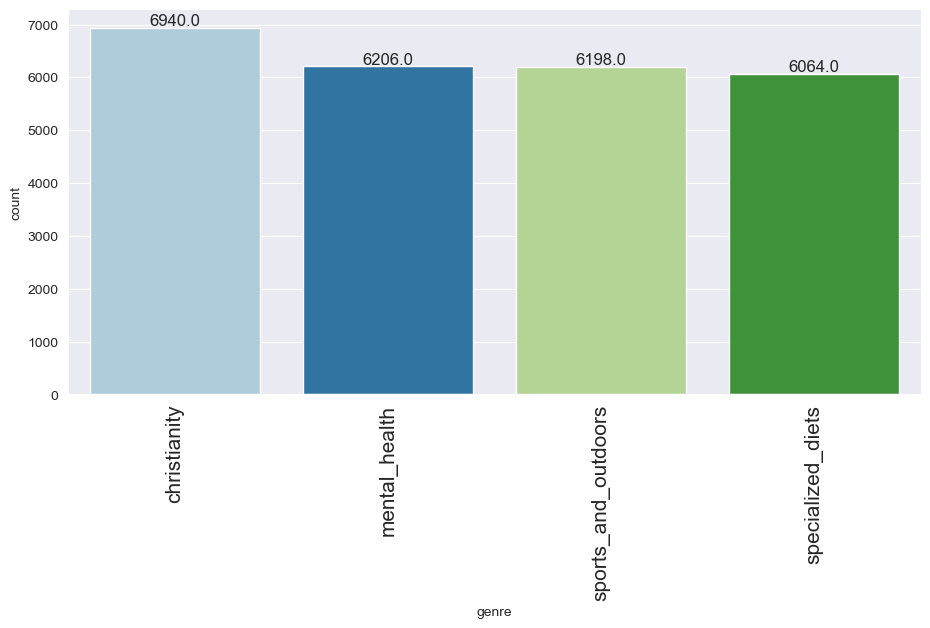

In [53]:
sort_values_labeled_barplot_top_values(final_df, "genre")

## Observation
- Data is imbalanced between the distribution of all book genre's

## Query the "sentiment" feature for all of the Book Genre's

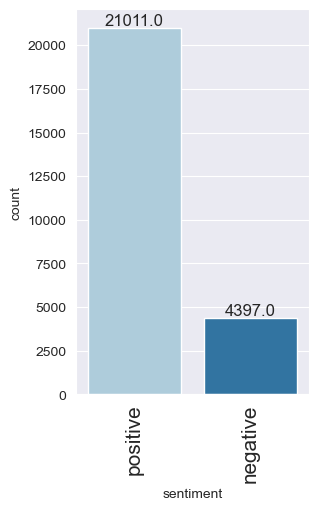

In [54]:
sort_values_labeled_barplot(final_df, "sentiment")

## Observation
- Imbalanced distribution of positive and negative sentiment values in all of the total genre's 
  - christianity
  - mental health
  - specialized diets
  - sports and outdoors
- More positive sentiment than negative sentiment (5:1 ratio)

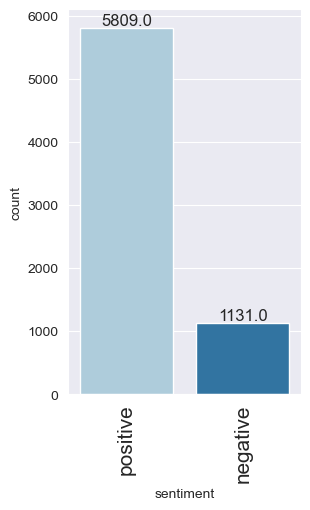

In [55]:
sort_values_labeled_barplot(final_df[final_df.genre=='christianity'], "sentiment")

## Observation
- Imbalanced distribution of positive and negative sentiment values in the christianity genre
- More positive sentiment than negative sentiment

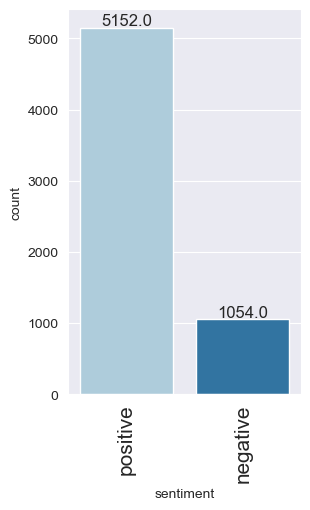

In [56]:
sort_values_labeled_barplot(final_df[final_df.genre=='mental_health'], "sentiment")

## Observation
- Imbalanced distribution of positive and negative sentiment values in the mental health genre
- More positive sentiment than negative sentiment

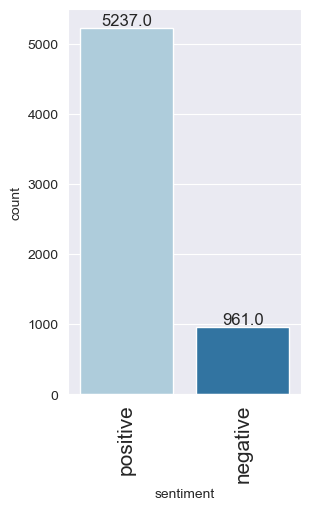

In [57]:
sort_values_labeled_barplot(final_df[final_df.genre=='sports_and_outdoors'], "sentiment")

## Observation
- Imbalanced distribution of positive and negative sentiment values in the sports and outdoors genre
- More positive sentiment than negative sentiment

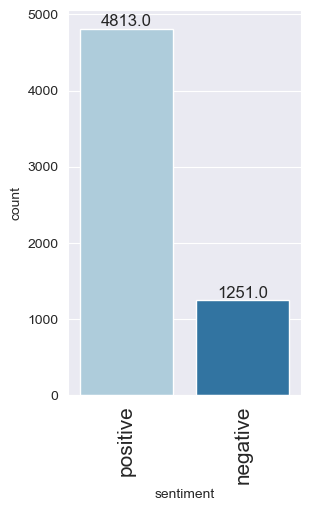

In [58]:
sort_values_labeled_barplot(final_df[final_df.genre=='specialized_diets'], "sentiment")

## Observation
- Imbalanced distribution of positive and negative sentiment values in the specialized diets genre
- More positive sentiment than negative sentiment

**Preparation**
  -  Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). <b>Explain why your chosen method is appropriate or use more than one method as appropriate.</b> Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

It is clear that our dataset is unbalanced. An imbalanced dataset may result in potential risks when we train the model. In order to eliminate the negative influence 
of imbalance, we decided to import sklearn's train_test_split library package to  perform the train and test partitioning of dataset.
Because the train_test_split library package is able to maintain the percentage of each class in the dataset and randomly split the data 
into train and test datasets with a 80:20 ratio.

In summary, our approach demonstrates a careful selection of techniques that are well-suited for handling imbalanced datasets and ensuring a realistic mirroring of how the algorithm would be used in practice.

- TRAINING Dataset: Number of texts in the class 'christianity':    6940
- TRAINING Dataset: Number of texts in the class 'mental_health':   6206
- TRAINING Dataset: Number of texts in the class 'sports_and_outdoors':    6198
- TRAINING Dataset: Number of texts in the class 'specialized_diets':    6064

Total number of classes in the Training Dataset: 25408

At the same time, there are an unequal amount of 'christianity', 'mental_health', 'sports_and_outdoors', and 'specialized_diets' - positive and negative sentiments within the unique class distribution 

Our team has decided to use **Stratified 10-fold cross-validation** (`StratifiedKFold(n_splits=10)`).

**Reasoning:**
- This method is appropriate when dealing with an imbalanced dataset, as it ensures that each fold maintains the same class distribution as the original dataset.
- Stratified cross-validation is particularly useful when you have minority classes that might be underrepresented in the dataset.

### Overall Approach:

- Our chosen approach reflects a thoughtful consideration of the dataset's characteristics, aiming to address issues related to imbalanced classes.
- By using Stratified 10-fold cross-validation, you are ensuring that the evaluation process is robust and representative of the class distribution in each fold.
- The F2 score as the scoring method aligns well with the imbalanced nature of the dataset, providing a more comprehensive evaluation of the model's performance.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### <a href="#TOC_6">TOP</a>

## <a id="univariate_data_analysis_6">2 - Modeling</a>

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Modeling (<b>6 points total</b>)</h3>
    <ul>
        <li><b>[2.0 points]</b> Investigate at <b>least two different recurrent network architectures.</b>  Be sure to <b>use an embedding layer.</b> Adjust hyper-parameters of the networks as needed to improve generalization performance <b>(train a total of at least four models).</b> Discuss the performance of each network and compare them. <b>Justify your choice of parameters for each.</b> </li>
        <li><b>[1.0 points]</b> Use the <b>Glove pre-trained embedding.</b> Provide justification of the embedding size.</li>
        <li><b>[1.0 points]</b> Using the best parameters and architecture from the RNN in the previous step, <b>add a second recurrent chain to your RNN.</b> The input to the second chain should be the output sequence of the first chain. Visualize the performance of training and validation sets versus the training iterations. </li>
        <li><b>[0.5 points]</b> Run to convergence.</li>
        <li><b>[0.5 points]</b> Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab.</li>
        <li><b>[1.0 points]</b> Visualize the results of all the RNNs you trained.</li>
    </ul>
</div>

## Why Embedding layer?  What is it's Use?

The Embedding layer in neural networks is used to represent words or categorical entities as vectors in a continuous vector space. In natural language processing (NLP), words are typically represented as discrete entities (e.g., indices or one-hot encodings), which can be inefficient and lack semantic relationships. The Embedding layer aims to address these issues by mapping words to dense vectors where the proximity of vectors captures semantic similarity.

Here are key aspects of the Embedding layer:

1. **Word Representation:** The Embedding layer learns a continuous representation (embedding) for each word in the vocabulary. Each word is mapped to a high-dimensional vector (embedding vector), and these vectors are learned during the training process.

2. **Dense Vector Space:** Unlike one-hot encoding, which results in sparse vectors with mostly zero values, embeddings create dense vectors with real-valued elements. Dense vectors allow the model to capture more nuanced relationships between words.

3. **Semantic Similarity:** Words with similar meanings or contexts tend to have similar embeddings. For example, in the embedding space, the vectors for "king" and "queen" might be close to each other, reflecting their semantic relationship.

4. **Learned Representation:** The embedding vectors are learned through the training process. The model adjusts the vectors to minimize the loss function, optimizing the embeddings for the specific task.

5. **Dimensionality:** The dimensionality of the embedding vectors is a hyperparameter that needs to be specified. It determines the size of the vector space in which words are represented. Common choices are 50, 100, 200, or more, depending on the size of the dataset and the complexity of the task.

In the context of recurrent neural networks (RNNs) or other sequence models, the Embedding layer is often used as the first layer in the network. It takes as input the indices of words in the sequences and converts them into dense vectors. These vectors are then fed into the subsequent layers of the model.

In summary, the Embedding layer is a crucial component in NLP models, providing an effective way to represent words in a continuous vector space, capture semantic relationships, and improve the efficiency of learning from text data.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, 
                                     LSTM, 
                                     GRU, 
                                     Dense, 
                                     Dropout)

from tensorflow.keras.layers import (Dense,
                                     Input,
                                     Dropout,
                                     GlobalAveragePooling2D,
                                     Flatten,
                                     Conv2D,
                                     BatchNormalization,
                                     Activation,
                                     MaxPooling2D,
                                     LeakyReLU)

from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
import time
import datetime
from datetime import timedelta

datetimeFormat = '%Y-%m-%d %H:%M%S.%f'

In [61]:
from keras.callbacks import (ModelCheckpoint, EarlyStopping, ReduceLROnPlateau)

checkpoint = ModelCheckpoint("./model1.h5",
                             monitor='val_f2_micro',  # Corrected to match your custom metric name
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [62]:
# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_f2_micro', patience=2, restore_best_weights=True)

epochs = 50

## <b>Loading the Embedding</b>

- Use the Glove pre-trained embedding. Provide justification of the embedding size.

In [63]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = 1000 # maximum and minimum number of words
NUM_CLASSES = 4

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
final_df = final_df.astype({'corpus text':'str'})
tokenizer.fit_on_texts(final_df['corpus text'])
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(final_df['corpus text'])

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

XXX = pad_sequences(sequences, maxlen=MAX_ART_LEN)

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
final_df['genre_encoded'] = label_encoder.fit_transform(final_df['genre'])

# Now, use to_categorical on the encoded labels
y_ohe = to_categorical(final_df['genre_encoded'], num_classes=NUM_CLASSES)

print('Shape of data tensor:', XXX.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(XXX))

Found 43939 unique tokens. Distilled to 43939 top words.
Shape of data tensor: (25408, 1000)
Shape of label tensor: (25408, 4)
43939


In [64]:
final_df['genre_encoded'].shape

(25408,)

In [65]:
final_df['genre'].value_counts()

genre
christianity           6940
mental_health          6206
sports_and_outdoors    6198
specialized_diets      6064
Name: count, dtype: int64

XXX_train Shape: (20326, 1000) Label Shape: (20326, 4)


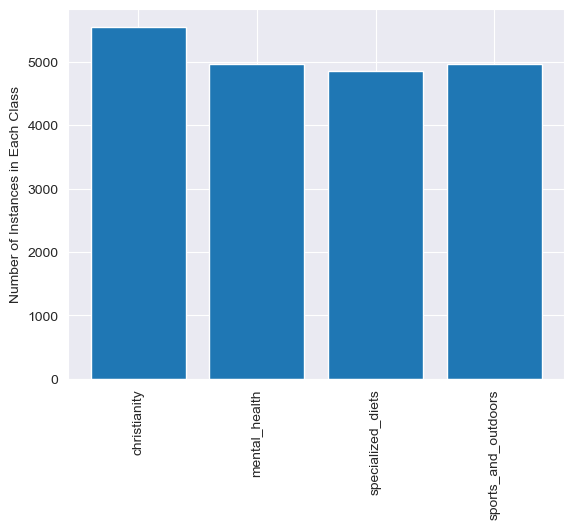

In [66]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# Split it into train / test subsets
XXX_train, XXX_test, y_train_ohe, y_test_ohe = train_test_split(XXX, 
                                                            y_ohe, 
                                                            test_size=0.2,
                                                            stratify=final_df['genre_encoded'], 
                                                            shuffle=True,
                                                            random_state=42)


NUM_CLASSES = 4

# Get unique genre names
unique_genres = final_df['genre'].unique()

# print some stats of the data
print("XXX_train Shape:",XXX_train.shape, "Label Shape:", y_train_ohe.shape)
uniq_classes = np.sum(y_train_ohe,axis=0)
plt.bar(list(range(NUM_CLASSES)),uniq_classes)
plt.xticks(list(range(NUM_CLASSES)), unique_genres, rotation='vertical')
plt.ylabel("Number of Instances in Each Class")
plt.show()

In [67]:
# Convert integer labels to one-hot encoding
#y_train_ohe = to_categorical(y_train_ohe, num_classes=NUM_CLASSES)
#y_test_ohe = to_categorical(y_test_ohe, num_classes=NUM_CLASSES)

## <b>Key Facts About Justification of the EMBED Size Selection</b>
The embed size should match the file you load glove from.
- In this case we used the glove.6B.100d.txt
  - therefore the EMBED size MUST BE SET to 100

In [68]:
'''%%time

import zipfile
import numpy as np

zip_file_path = 'D:\\PG - UT-Austin Data Science\\CLASS\\mscs_ai\\cs7324\\data\\pre-trained-embeddings\\glove.6B.zip'
target_file = 'glove.6B.100d.txt'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the target file
    zip_ref.extract(target_file, path='.')

# Path to the extracted file
extracted_file_path = target_file

# Read the embeddings
# the embed size should match the file you load glove from
EMBED_SIZE = 100
embeddings_index = {}
with open(extracted_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))'''

"%%time\n\nimport zipfile\nimport numpy as np\n\nzip_file_path = 'D:\\PG - UT-Austin Data Science\\CLASS\\mscs_ai\\cs7324\\data\\pre-trained-embeddings\\glove.6B.zip'\ntarget_file = 'glove.6B.100d.txt'\n\n# Open the zip file\nwith zipfile.ZipFile(zip_file_path, 'r') as zip_ref:\n    # Extract the target file\n    zip_ref.extract(target_file, path='.')\n\n# Path to the extracted file\nextracted_file_path = target_file\n\n# Read the embeddings\n# the embed size should match the file you load glove from\nEMBED_SIZE = 100\nembeddings_index = {}\nwith open(extracted_file_path, encoding='utf-8') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype='float32')\n        embeddings_index[word] = coefs\n\nprint('Found %s word vectors.' % len(embeddings_index))"

In [69]:
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('glove/glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (43940, 100) 
 Total words found: 34241 
 Percentage: 77.92671825216203


In [70]:
# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

In [71]:
print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Embedding Shape: (43940, 100) 
 Total words found: 34241 
 Percentage: 77.92671825216203


In [72]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

## <b>1. RNN Architecture Based On LSTM</b>

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

lstm_model  = Sequential()
lstm_model.add(embedding_layer)
#lstm_model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(LSTM(100,dropout=0.2))
lstm_model.add(Dense(NUM_CLASSES, activation='softmax')) # assuming you have 4 genres

lstm_model.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy', f2_micro])

print(lstm_model.summary())

2023-12-11 21:31:28.792709: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-11 21:31:28.792794: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-11 21:31:28.792823: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-11 21:31:28.793068: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-11 21:31:28.793091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 4474804 (17.07 MB)
Trainable params: 80804 (315.64 KB)
Non-trainable params: 4394000 (16.76 MB)
_________________________________________________________________
None


In [73]:
XXX_train.shape

(20326, 1000)

In [74]:
y_train_ohe.shape

(20326, 4)

In [75]:
XXX_test.shape

(5082, 1000)

In [76]:
y_test_ohe.shape

(5082, 4)

## Example RNN
- https://www.tensorflow.org/guide/keras/working_with_rnns
- https://www.tensorflow.org/text/tutorials/text_classification_rnn#stack_two_or_more_lstm_layers"
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU
- https://www.tensorflow.org/text/tutorials/word_embeddings
- https://www.tensorflow.org/text/tutorials/warmstart_embedding_matrix
- https://www.tensorflow.org/text/tutorials/word2vec

In [77]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))
    
# Train the model
lstm_rnn_history = []
lstm_history = [] 
tmp = lstm_model.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              #validation_split=0.2,
              #callbacks=[early_stopping])
             )
lstm_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
lstm_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-11 21:31:29

Epoch 1/50


2023-12-11 21:31:29.701812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 21:31:29.918517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 21:31:30.174730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 0.9786 - accuracy: 0.5890 - f2_micro: 0.4485

2023-12-11 21:32:25.851193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 21:32:25.921678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 60s 187ms/step - loss: 0.9786 - accuracy: 0.5890 - f2_micro: 0.4485 - val_loss: 0.8299 - val_accuracy: 0.6708 - val_f2_micro: 0.5984
Epoch 2/50
318/318 [==============================] - 59s 185ms/step - loss: 0.7572 - accuracy: 0.6976 - f2_micro: 0.6185 - val_loss: 0.6865 - val_accuracy: 0.7210 - val_f2_micro: 0.6421
Epoch 3/50
318/318 [==============================] - 59s 185ms/step - loss: 0.6734 - accuracy: 0.7268 - f2_micro: 0.6555 - val_loss: 0.6232 - val_accuracy: 0.7525 - val_f2_micro: 0.6824
Epoch 4/50
318/318 [==============================] - 59s 185ms/step - loss: 0.6364 - accuracy: 0.7447 - f2_micro: 0.6779 - val_loss: 0.5925 - val_accuracy: 0.7625 - val_f2_micro: 0.6984
Epoch 5/50
318/318 [==============================] - 59s 186ms/step - loss: 0.6045 - accuracy: 0.7569 - f2_micro: 0.6898 - val_loss: 0.5698 - val_accuracy: 0.7682 - val_f2_micro: 0.7061
Epoch 6/50
318/318 [==============================] - 59s 186ms/step - loss:

In [66]:
# final metrics for base lstm
base_lstm_val_f2_micro = 0.7649
base_lstm_train_f2_micro = 0.9040

In [78]:
# convert ohe to single-digits so heatmap can work
import numpy as np
rounded_labels=np.argmax(y_test_ohe, axis=1)

  1/159 [..............................] - ETA: 51s

2023-12-11 22:20:36.019038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:20:36.094199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 5s 27ms/step


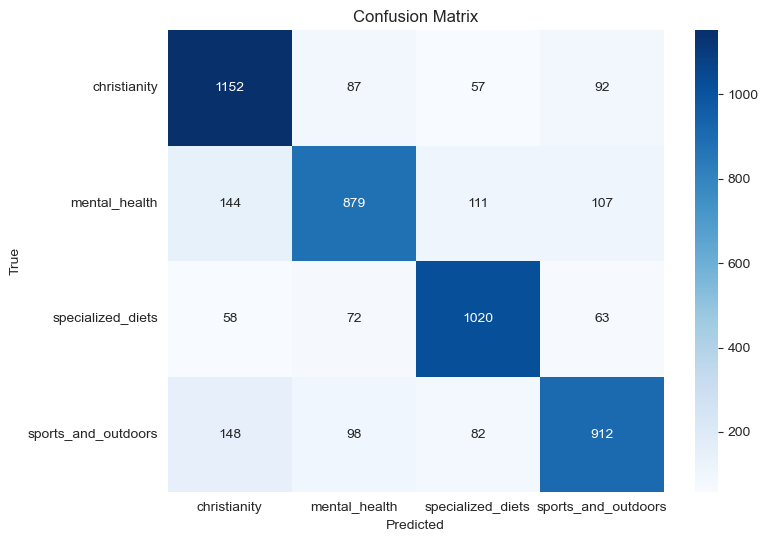

In [79]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = lstm_model.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [80]:
XXX_test_pd = pd.DataFrame(XXX_test)
rounded_labels_pd = pd.DataFrame(rounded_labels)

# predictions for two data points
# Test a single sample
sample_index = 23
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = lstm_model.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 78ms/step

Actual Genre: specialized_diets
Predicted Genre: specialized_diets


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/3253040668.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


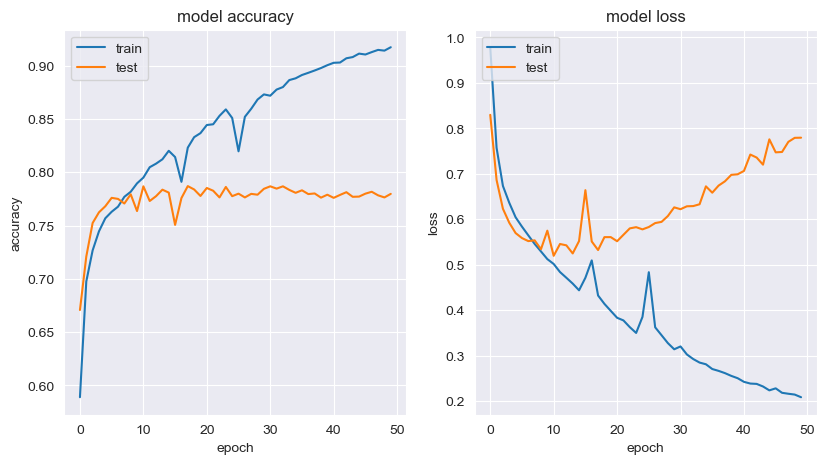

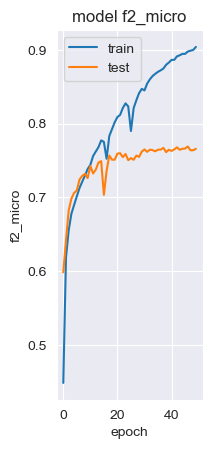

In [129]:
# combine all the history from training together
combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    combined[key] = np.hstack([x.history[key] for x in lstm_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined['accuracy'])
plt.plot(combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(combined['f2_micro'])
plt.plot(combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('lstm_base.png')
plt.show()

In [105]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.title('model '+metric)
    plt.plot(history[metric])
    plt.plot(history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

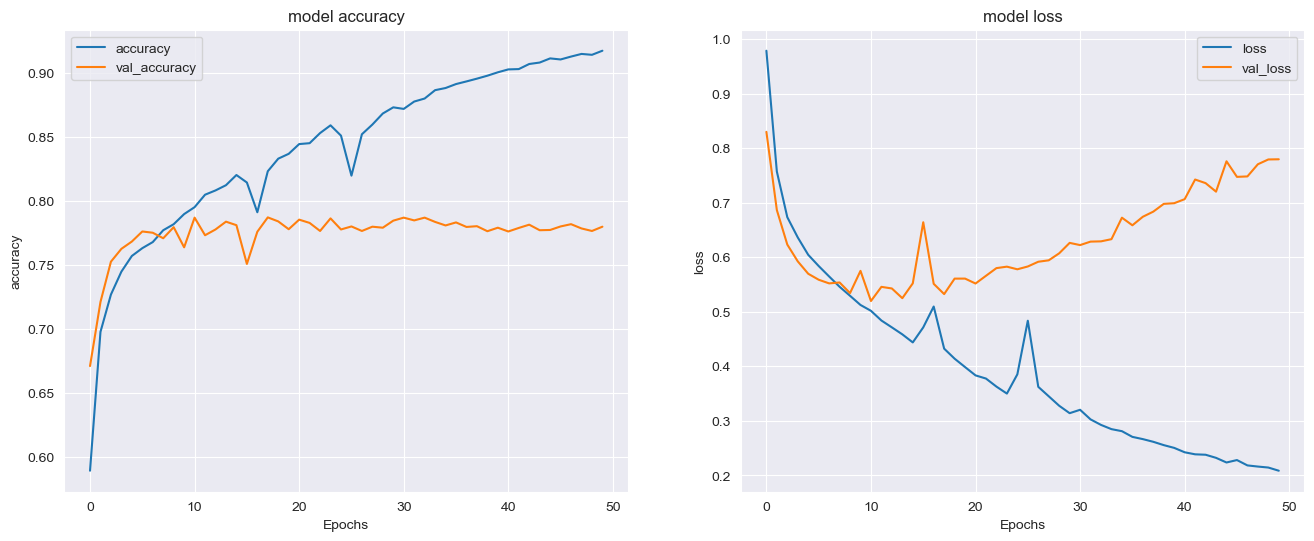

In [83]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(lstm_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(lstm_history[0], 'loss')

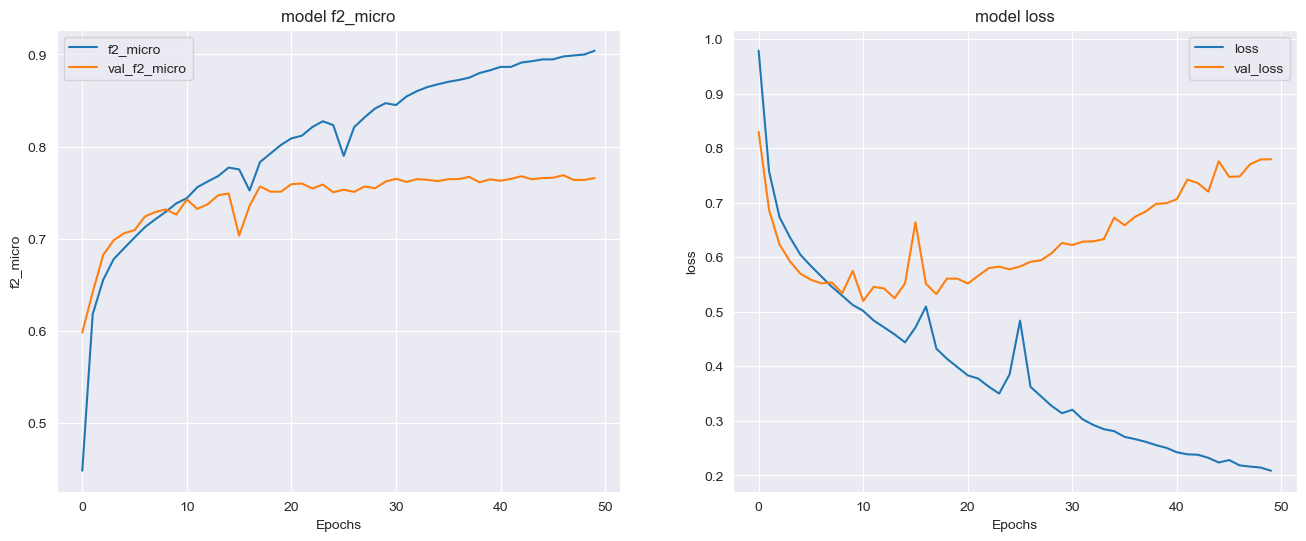

In [84]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(lstm_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(lstm_history[0], 'loss')

## Create Hyperparameters/Add Layers

- Adjust hyper-parameters of the networks as needed to improve generalization performance <b>(train a total of at least four models).</b> 
- Discuss the performance of each network and compare them. <b>Justify your choice of parameters for each.</b> 

###  LSTM CUSTOM MODEL1

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
lstm_model_customized = Sequential()
lstm_model_customized.add(embedding_layer)
lstm_model_customized.add(LSTM(100, dropout=0.2, return_sequences=True))  # Note the return_sequences=True
lstm_model_customized.add(LSTM(50, dropout=0.2))  # Added another LSTM layer
lstm_model_customized.add(BatchNormalization())
lstm_model_customized.add(Dense(64, activation='relu'))  # Added a Dense layer
lstm_model_customized.add(BatchNormalization())
lstm_model_customized.add(Dropout(0.5))  # Added Dropout for regularization
lstm_model_customized.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
lstm_model_customized.compile(optimizer='rmsprop', 
                              loss='categorical_crossentropy', 
                              metrics=['accuracy', f2_micro])

# Print model summary
print(lstm_model_customized.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 lstm_1 (LSTM)               (None, 1000, 100)         80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                     

In [89]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))
    
# Train the model
lstm_custom_rnn_history = []
lstm_custom_history = [] 
tmp = lstm_model_customized.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              validation_split=0.2,
              #callbacks=[early_stopping])
             )
lstm_custom_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
lstm_custom_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-11 22:21:15

Epoch 1/50


2023-12-11 22:21:15.967721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:21:16.324890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:21:16.418688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:21:17.019542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:21:17.167041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 1.1588 - accuracy: 0.5465 - f2_micro: 0.4729

2023-12-11 22:22:42.755327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:22:42.869892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 22:22:42.944435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 94s 288ms/step - loss: 1.1588 - accuracy: 0.5465 - f2_micro: 0.4729 - val_loss: 0.8673 - val_accuracy: 0.6373 - val_f2_micro: 0.5164
Epoch 2/50
318/318 [==============================] - 91s 285ms/step - loss: 0.8102 - accuracy: 0.6759 - f2_micro: 0.6099 - val_loss: 0.7598 - val_accuracy: 0.7011 - val_f2_micro: 0.6346
Epoch 3/50
318/318 [==============================] - 91s 285ms/step - loss: 0.7246 - accuracy: 0.7103 - f2_micro: 0.6499 - val_loss: 0.6466 - val_accuracy: 0.7438 - val_f2_micro: 0.6802
Epoch 4/50
318/318 [==============================] - 91s 285ms/step - loss: 0.6753 - accuracy: 0.7291 - f2_micro: 0.6711 - val_loss: 0.7161 - val_accuracy: 0.6958 - val_f2_micro: 0.6512
Epoch 5/50
318/318 [==============================] - 91s 285ms/step - loss: 0.6505 - accuracy: 0.7328 - f2_micro: 0.6820 - val_loss: 0.6092 - val_accuracy: 0.7473 - val_f2_micro: 0.7081
Epoch 6/50
318/318 [==============================] - 91s 285ms/step - loss:

In [72]:
# final metrics for custom lstm 1
cus1_lstm_val_f2_micro = 0.7529
cus1_lstm_train_f2_micro = 0.8284

2023-12-11 23:36:43.780006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:43.893269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/159 [..............................] - ETA: 1:22

2023-12-11 23:36:43.995305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 8s 46ms/step


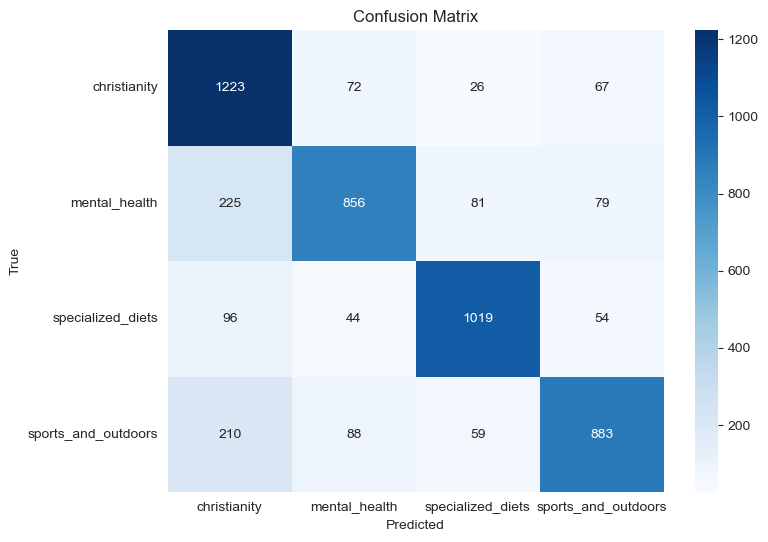

In [90]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = lstm_model_customized.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [91]:
# predictions for two data points
# Test a single sample
sample_index = 0
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = lstm_model_customized.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 111ms/step

Actual Genre: christianity
Predicted Genre: christianity


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/2339249930.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


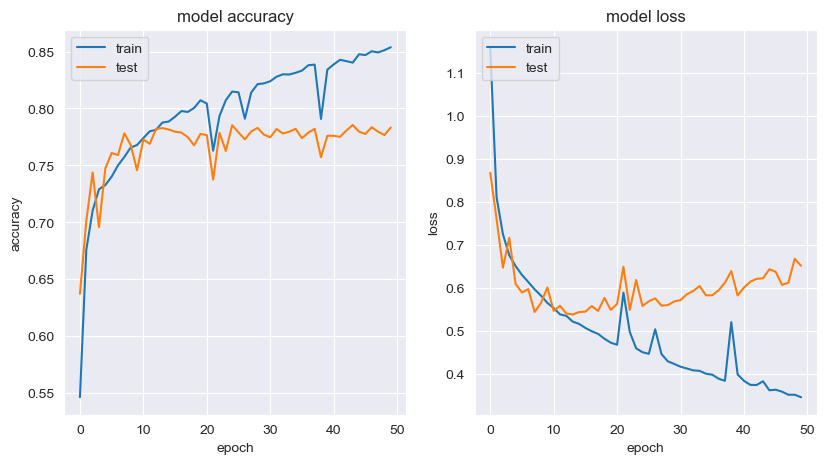

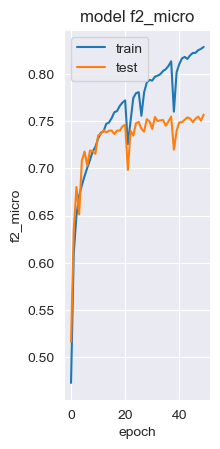

In [132]:
# combine all the history from training together
combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    combined[key] = np.hstack([x.history[key] for x in lstm_custom_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined['accuracy'])
plt.plot(combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(combined['f2_micro'])
plt.plot(combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('lstm_custom.png')
plt.show()

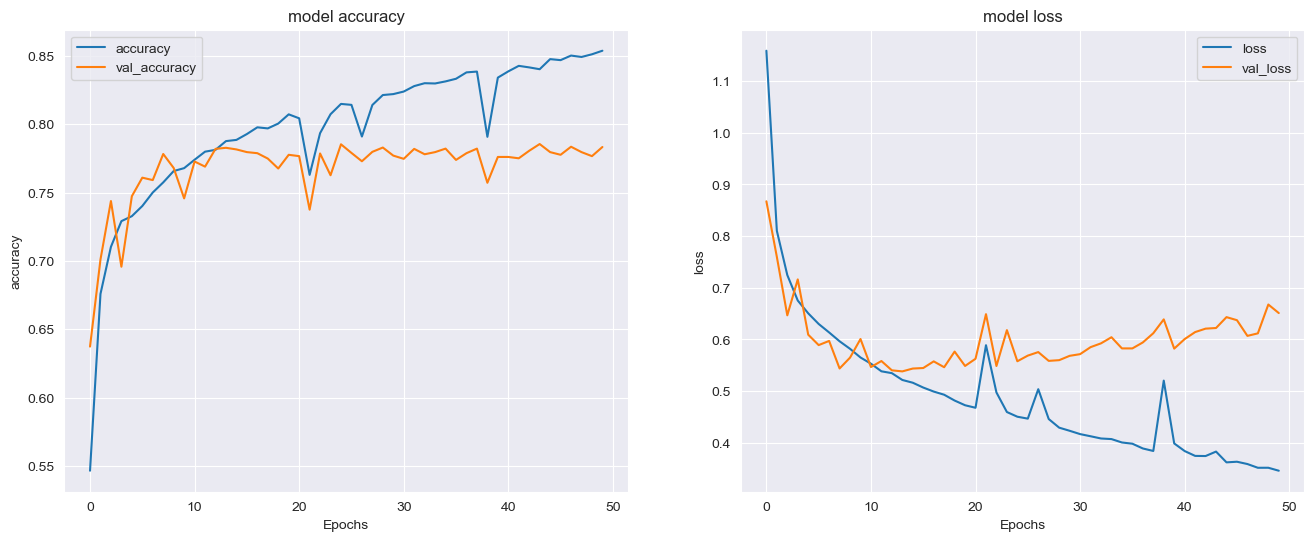

In [136]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(lstm_custom_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(lstm_custom_history[0], 'loss')

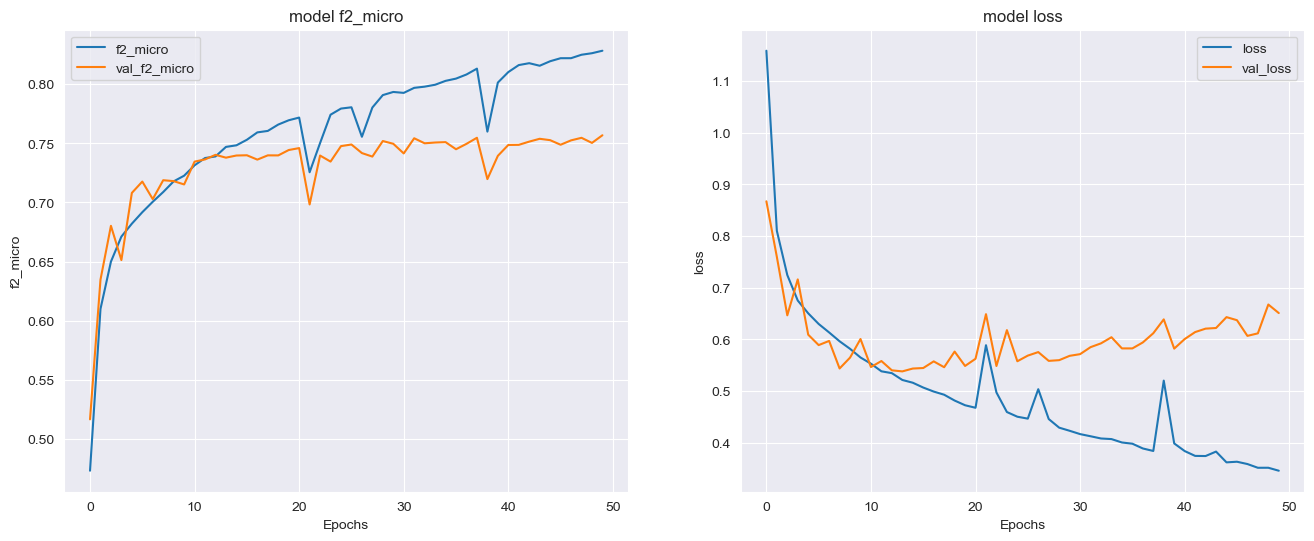

In [139]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(lstm_custom_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(lstm_custom_history[0], 'loss')

###  LSTM CUSTOM MODEL2

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Bidirectional
from keras.optimizers.legacy import Adam

# Define the model
lstm_model2_customized = Sequential()
lstm_model2_customized.add(embedding_layer)
lstm_model2_customized.add(Bidirectional(LSTM(100, dropout=0.2, return_sequences=True))) # Note the return_sequences=True
lstm_model2_customized.add(Bidirectional(LSTM(50, dropout=0.2))) # Added another LSTM layer
lstm_model2_customized.add(BatchNormalization())
lstm_model2_customized.add(Dense(64, activation='relu'))  # Added a Dense layer
lstm_model2_customized.add(BatchNormalization())
lstm_model2_customized.add(Dropout(0.5))  # Added Dropout for regularization
lstm_model2_customized.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
lstm_model2_customized.compile(Adam(lr=0.001), 
                              #optimizer='rmsprop',
                              loss='categorical_crossentropy', 
                              metrics=['accuracy', f2_micro])

# Print model summary
print(lstm_model2_customized.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 bidirectional (Bidirection  (None, 1000, 200)         160800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               100400    
 onal)                                                           
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                6464      
                                                      

/Users/cameronervin/anaconda3/envs/mlenv2023/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [93]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))
    
# Train the model
lstm_custom2_rnn_history = []
lstm_custom2_history = [] 
tmp = lstm_model2_customized.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              validation_split=0.2,
              #callbacks=[early_stopping])
             )
lstm_custom2_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
lstm_custom2_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-11 23:36:52

Epoch 1/50


2023-12-11 23:36:53.751062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:54.265099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:54.283798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:54.688317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:54.713742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:55.282774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:36:55.308955: I tensorflow/core/grappler/optimizers/cust

318/318 [==============================] - ETA: 0s - loss: 1.1458 - accuracy: 0.5612 - f2_micro: 0.4909

2023-12-11 23:40:00.971160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:40:01.165105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:40:01.183187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:40:01.394005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-11 23:40:01.407136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 202s 627ms/step - loss: 1.1458 - accuracy: 0.5612 - f2_micro: 0.4909 - val_loss: 0.8625 - val_accuracy: 0.6702 - val_f2_micro: 0.4693
Epoch 2/50
318/318 [==============================] - 196s 616ms/step - loss: 0.8161 - accuracy: 0.6807 - f2_micro: 0.6159 - val_loss: 0.7478 - val_accuracy: 0.6905 - val_f2_micro: 0.6333
Epoch 3/50
318/318 [==============================] - 196s 616ms/step - loss: 0.7257 - accuracy: 0.7104 - f2_micro: 0.6502 - val_loss: 0.6797 - val_accuracy: 0.7328 - val_f2_micro: 0.6654
Epoch 4/50
318/318 [==============================] - 196s 616ms/step - loss: 0.6880 - accuracy: 0.7246 - f2_micro: 0.6672 - val_loss: 0.6725 - val_accuracy: 0.7310 - val_f2_micro: 0.7005
Epoch 5/50
318/318 [==============================] - 196s 616ms/step - loss: 0.6655 - accuracy: 0.7318 - f2_micro: 0.6765 - val_loss: 0.6415 - val_accuracy: 0.7375 - val_f2_micro: 0.6851
Epoch 6/50
318/318 [==============================] - 196s 618ms/step -

In [68]:
# final metrics for custom lstm 2
cus2_lstm_val_f2_micro = 0.7504
cus2_lstm_train_f2_micro = 0.8530

2023-12-12 02:20:15.823475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:16.006525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:16.020246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:16.201404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:16.217275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 17s 104ms/step


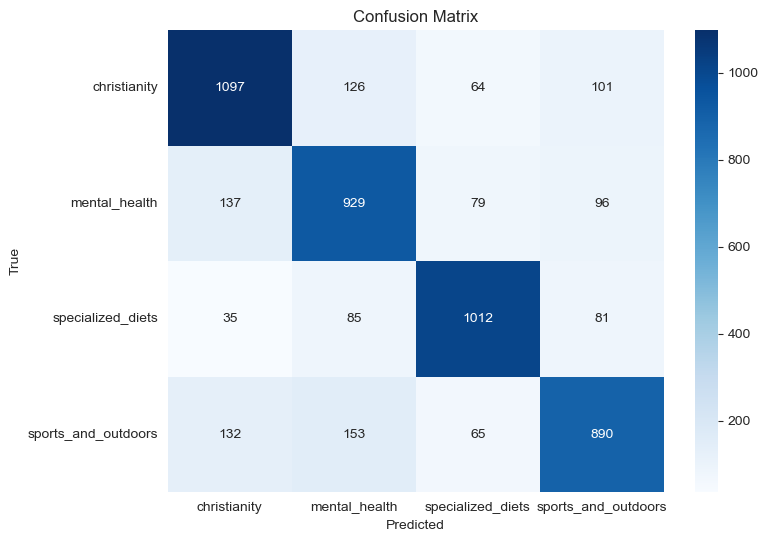

In [94]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = lstm_model2_customized.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [95]:
# predictions for two data points
# Test a single sample
sample_index = 0
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = lstm_model2_customized.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 207ms/step

Actual Genre: christianity
Predicted Genre: christianity


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/1991047051.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


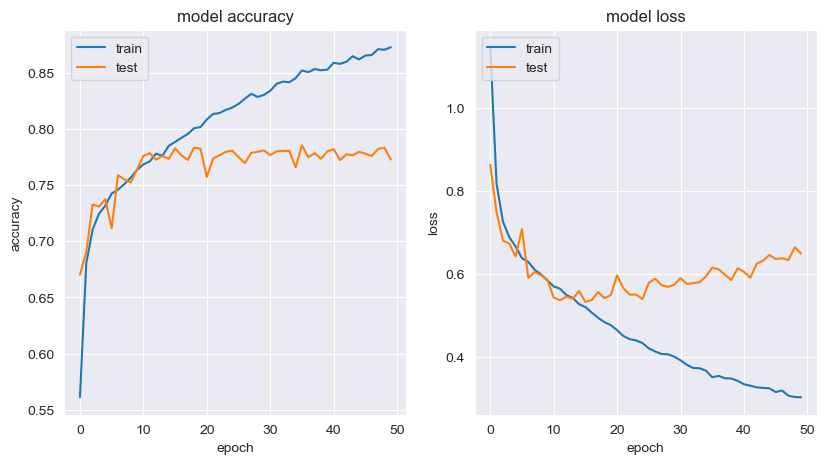

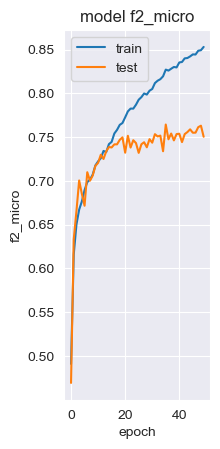

In [134]:
# combine all the history from training together
combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    combined[key] = np.hstack([x.history[key] for x in lstm_custom2_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(combined['accuracy'])
plt.plot(combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(combined['f2_micro'])
plt.plot(combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('lstm_custom2.png')
plt.show()

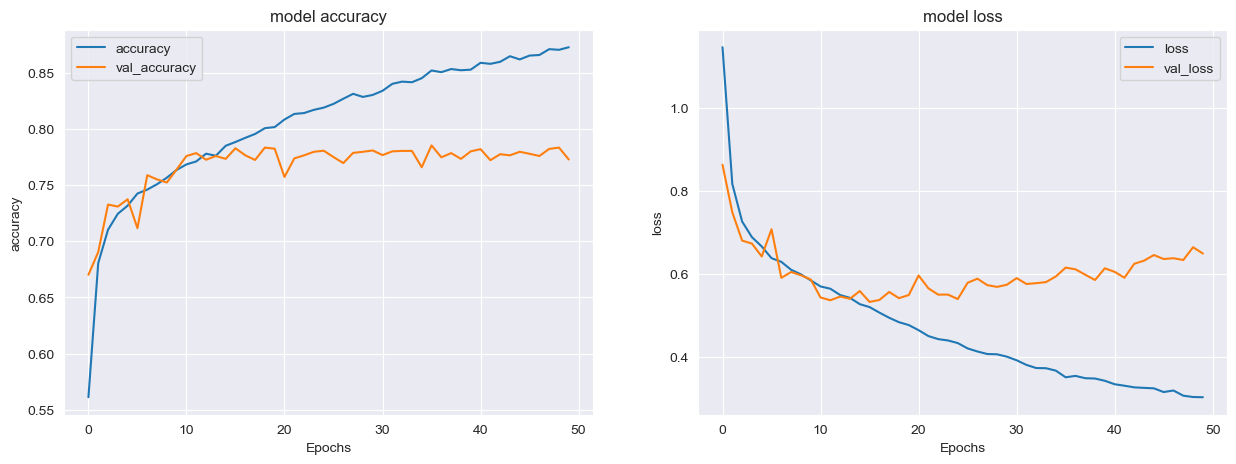

In [96]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(lstm_custom2_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(lstm_custom2_history[0], 'loss')

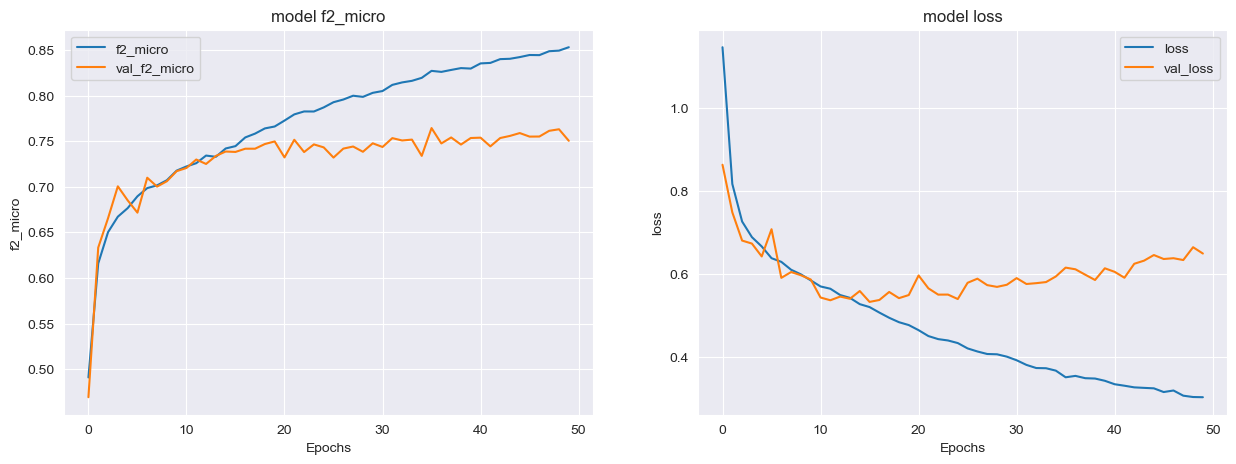

In [97]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(lstm_custom2_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(lstm_custom2_history[0], 'loss')

## <b>2. RNN Architecture Based On GRU</b>

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the model
gru_model = Sequential()
gru_model.add(embedding_layer)
gru_model.add(GRU(100, dropout=0.2))
gru_model.add(Dense(NUM_CLASSES, activation='softmax')) # assuming you have 4 genres

# Compile the model
gru_model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', f2_micro])

# Print model summary
print(gru_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         4394000   
                                                                 
 gru_5 (GRU)                 (None, 100)               60600     
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 4455004 (16.99 MB)
Trainable params: 61004 (238.30 KB)
Non-trainable params: 4394000 (16.76 MB)
_________________________________________________________________
None


In [103]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))

# Train the model
gru_rnn_history = []
gru_history = [] 
tmp = gru_model.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              #validation_split=0.2,
              #callbacks=[early_stopping])
             )
gru_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
gru_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 02:20:34

Epoch 1/50


2023-12-12 02:20:34.659010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:34.862635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:20:35.181597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 0.9077 - accuracy: 0.6114 - f2_micro: 0.4734

2023-12-12 02:21:23.668313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 02:21:23.750087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 53s 162ms/step - loss: 0.9077 - accuracy: 0.6114 - f2_micro: 0.4734 - val_loss: 0.6707 - val_accuracy: 0.7338 - val_f2_micro: 0.6690
Epoch 2/50
318/318 [==============================] - 51s 159ms/step - loss: 0.6696 - accuracy: 0.7279 - f2_micro: 0.6622 - val_loss: 0.6446 - val_accuracy: 0.7395 - val_f2_micro: 0.6718
Epoch 3/50
318/318 [==============================] - 51s 159ms/step - loss: 0.6248 - accuracy: 0.7475 - f2_micro: 0.6860 - val_loss: 0.5760 - val_accuracy: 0.7662 - val_f2_micro: 0.6983
Epoch 4/50
318/318 [==============================] - 51s 159ms/step - loss: 0.5978 - accuracy: 0.7577 - f2_micro: 0.6986 - val_loss: 0.5620 - val_accuracy: 0.7725 - val_f2_micro: 0.7144
Epoch 5/50
318/318 [==============================] - 51s 159ms/step - loss: 0.5772 - accuracy: 0.7666 - f2_micro: 0.7097 - val_loss: 0.5496 - val_accuracy: 0.7774 - val_f2_micro: 0.7144
Epoch 6/50
318/318 [==============================] - 51s 159ms/step - loss:

In [69]:
# final metrics for base gru
base_gru_val_f2_micro = 0.7643
base_gru_train_f2_micro = 0.8708

  1/159 [..............................] - ETA: 40s

2023-12-12 03:02:51.085288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:02:51.139562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 5s 29ms/step


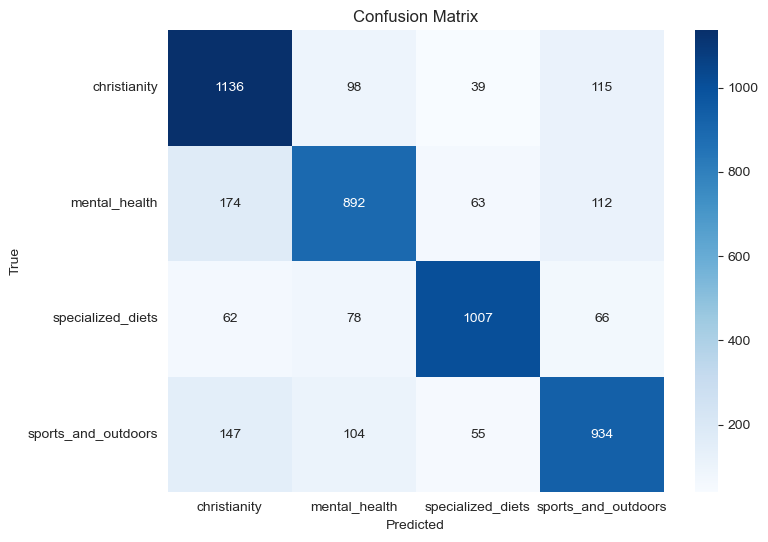

In [104]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = gru_model.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [105]:
# predictions for two data points
# Test a single sample
sample_index = 0
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = gru_model.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 84ms/step

Actual Genre: christianity
Predicted Genre: christianity


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/343059148.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


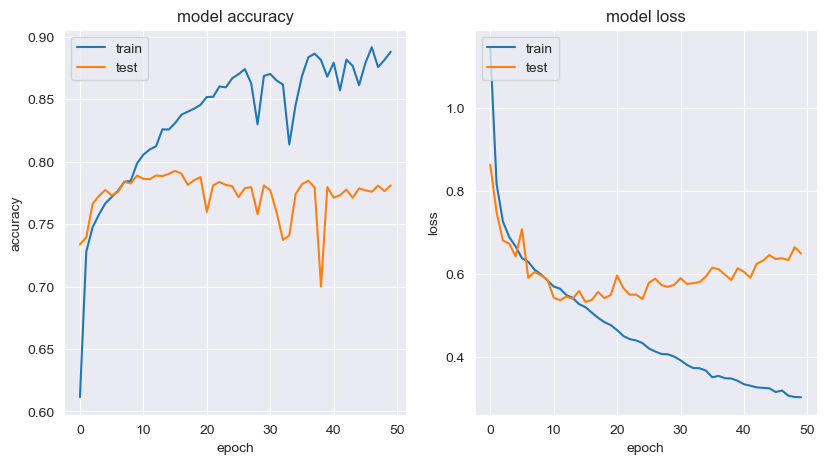

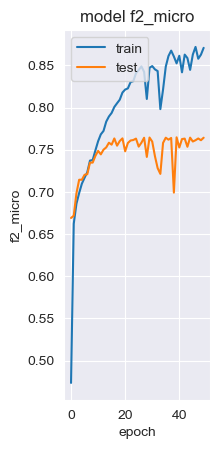

In [141]:
# combine all the history from training together
gru_combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    gru_combined[key] = np.hstack([x.history[key] for x in gru_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(gru_combined['accuracy'])
plt.plot(gru_combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(gru_combined['f2_micro'])
plt.plot(gru_combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('gru_base.png')
plt.show()

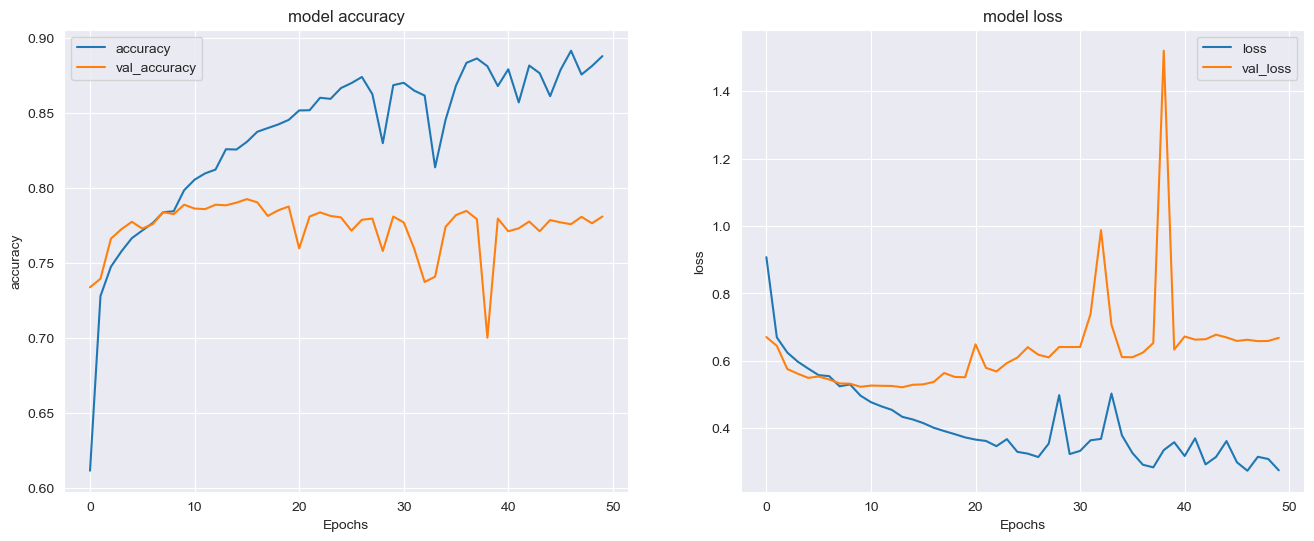

In [107]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(gru_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(gru_history[0], 'loss')

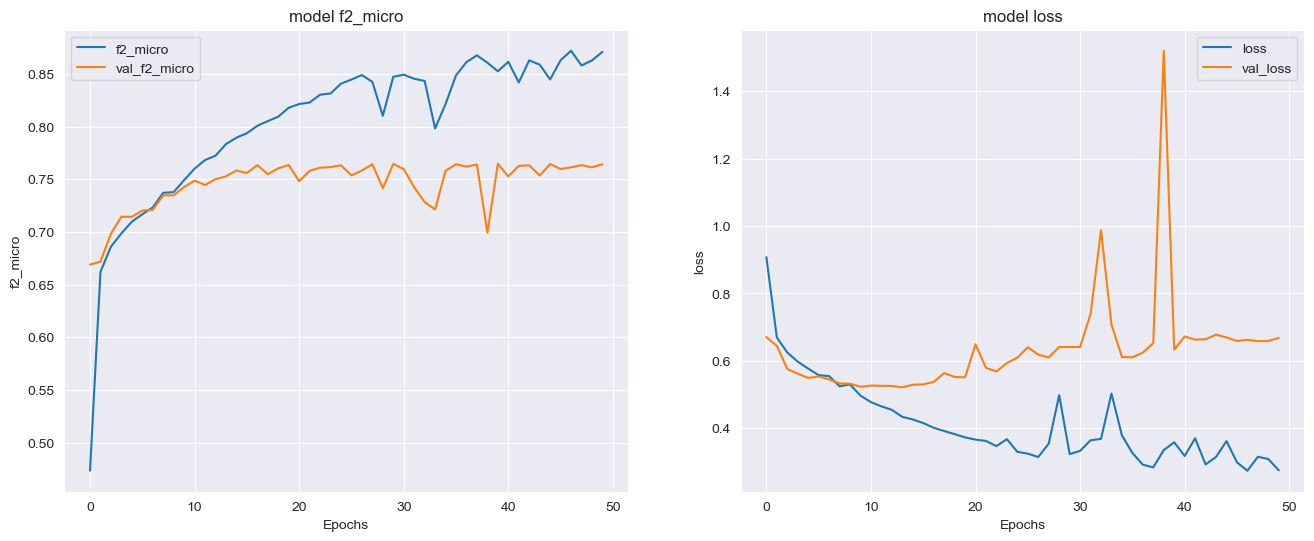

In [108]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(gru_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(gru_history[0], 'loss')

###  GRU CUSTOM MODEL1

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the model
gru_model_customized = Sequential()
gru_model_customized.add(embedding_layer)
gru_model_customized.add(GRU(100, dropout=0.2, return_sequences=True))  # Note the return_sequences=True
gru_model_customized.add(GRU(50, dropout=0.2))  # Added another LSTM layer
gru_model_customized.add(BatchNormalization())
gru_model_customized.add(Dense(64, activation='relu'))  # Added a Dense layer
gru_model_customized.add(BatchNormalization())
gru_model_customized.add(Dropout(0.5))  # Added Dropout for regularization
gru_model_customized.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
gru_model_customized.compile(optimizer='rmsprop', 
                              loss='categorical_crossentropy', 
                              metrics=['accuracy', f2_micro])

# Print model summary
print(gru_model_customized.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 gru_1 (GRU)                 (None, 1000, 100)         60600     
                                                                 
 gru_2 (GRU)                 (None, 50)                22800     
                                                                 
 batch_normalization_4 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 64)                3264      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                     

In [110]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))
    
# Train the model
gru_custom_rnn_history = []
gru_custom_history = [] 
tmp = gru_model_customized.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              validation_split=0.2,
              #callbacks=[early_stopping])
             )
gru_custom_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
gru_custom_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 03:02:57

Epoch 1/50


2023-12-12 03:02:57.993347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:02:58.373538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:02:58.508021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:02:59.388210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:02:59.582818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 1.1535 - accuracy: 0.5368 - f2_micro: 0.4547

2023-12-12 03:04:13.392671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:04:13.518533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 03:04:13.615210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 82s 249ms/step - loss: 1.1535 - accuracy: 0.5368 - f2_micro: 0.4547 - val_loss: 0.8883 - val_accuracy: 0.6202 - val_f2_micro: 0.5932
Epoch 2/50
318/318 [==============================] - 78s 244ms/step - loss: 0.7527 - accuracy: 0.6959 - f2_micro: 0.6362 - val_loss: 0.7925 - val_accuracy: 0.6993 - val_f2_micro: 0.6572
Epoch 3/50
318/318 [==============================] - 78s 244ms/step - loss: 0.6814 - accuracy: 0.7228 - f2_micro: 0.6694 - val_loss: 0.6417 - val_accuracy: 0.7397 - val_f2_micro: 0.6920
Epoch 4/50
318/318 [==============================] - 77s 244ms/step - loss: 0.6473 - accuracy: 0.7378 - f2_micro: 0.6849 - val_loss: 0.6021 - val_accuracy: 0.7493 - val_f2_micro: 0.6918
Epoch 5/50
318/318 [==============================] - 77s 244ms/step - loss: 0.6225 - accuracy: 0.7500 - f2_micro: 0.6955 - val_loss: 0.6422 - val_accuracy: 0.7430 - val_f2_micro: 0.7122
Epoch 6/50
318/318 [==============================] - 77s 244ms/step - loss:

In [70]:
# final metrics for custom gru 1
cus1_gru_val_f2_micro = 0.7554
cus1_gru_train_f2_micro = 0.8213

2023-12-12 04:07:26.973388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:27.085807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/159 [..............................] - ETA: 1:28

2023-12-12 04:07:27.190649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 7s 42ms/step


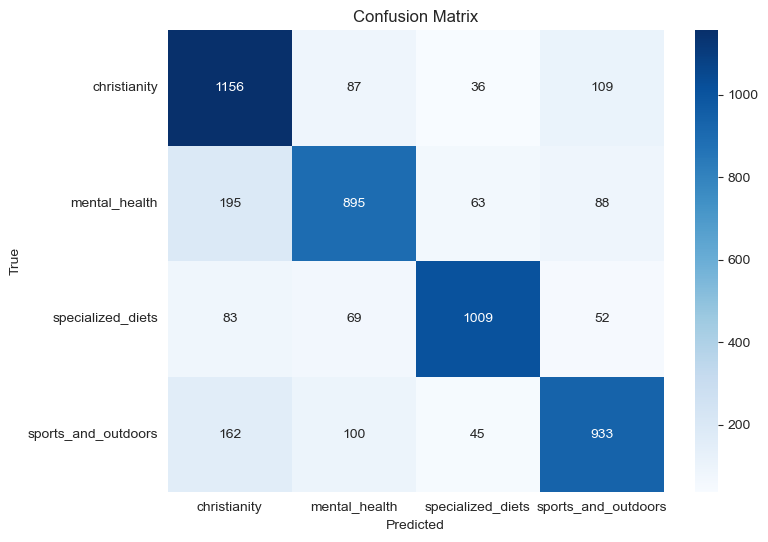

In [111]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = gru_model_customized.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [112]:
# predictions for two data points
# Test a single sample
sample_index = 0
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = gru_model_customized.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 124ms/step

Actual Genre: christianity
Predicted Genre: christianity


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/2598484610.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


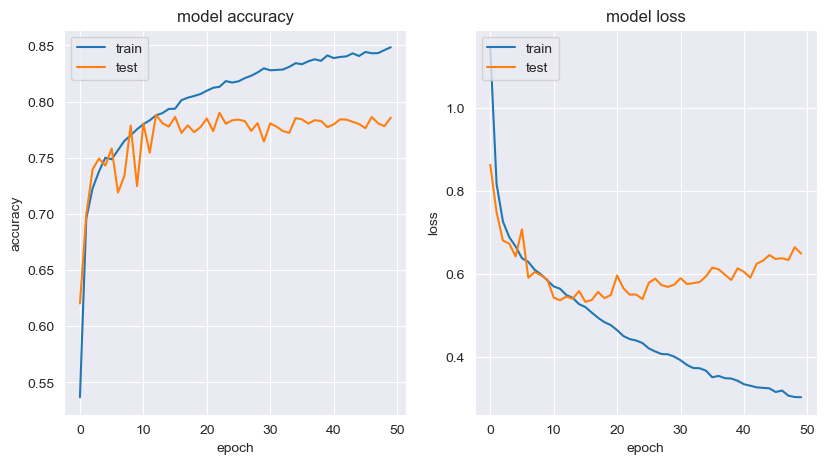

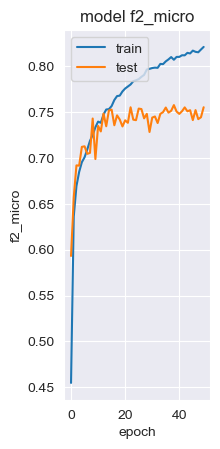

In [142]:
# combine all the history from training together
gru_combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    gru_combined[key] = np.hstack([x.history[key] for x in gru_custom_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(gru_combined['accuracy'])
plt.plot(gru_combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(gru_combined['f2_micro'])
plt.plot(gru_combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('gru_custom.png')
plt.show()

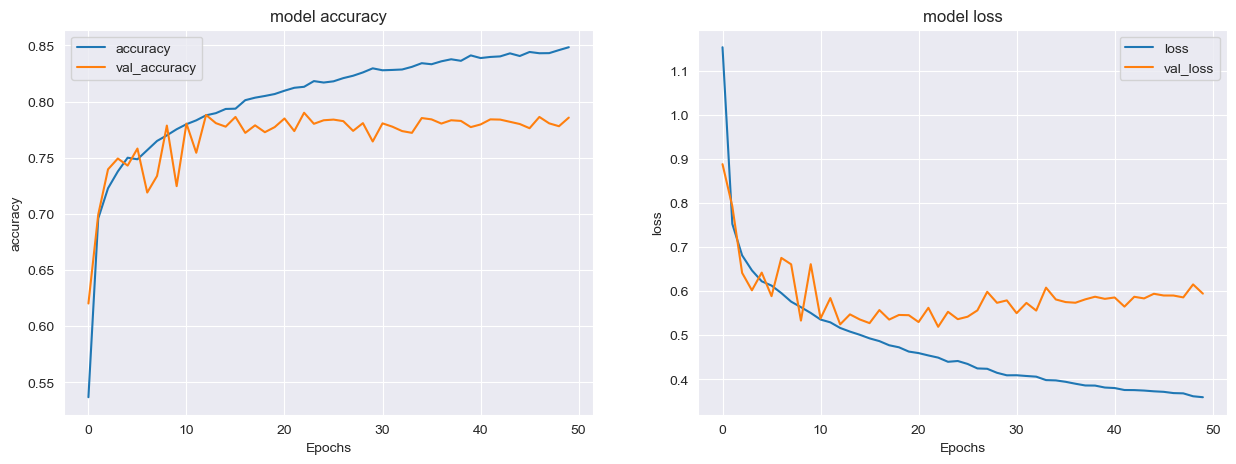

In [144]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(gru_custom_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(gru_custom_history[0], 'loss')

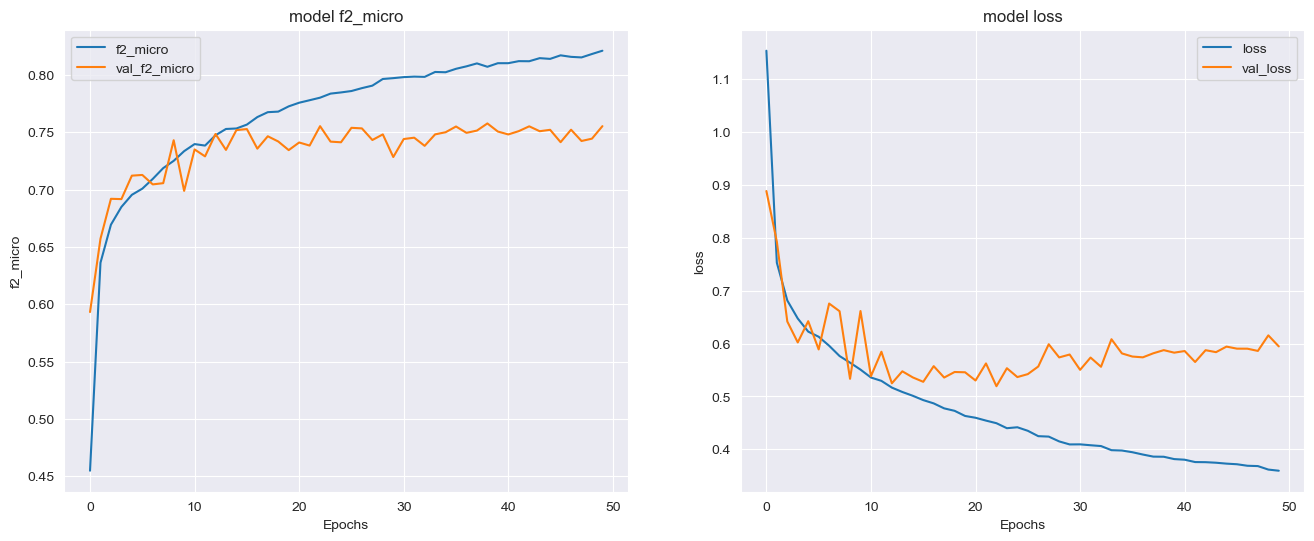

In [145]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(gru_custom_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(gru_custom_history[0], 'loss')

### GRU CUSTOM MODEL2

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from keras.layers import Bidirectional
from keras.optimizers.legacy import Adam

# Define the model
gru_model2_customized = Sequential()
gru_model2_customized.add(embedding_layer)
gru_model2_customized.add(Bidirectional(GRU(100, dropout=0.2, return_sequences=True))) # Note the return_sequences=True
gru_model2_customized.add(Bidirectional(GRU(50, dropout=0.2))) # Added another LSTM layer
gru_model2_customized.add(BatchNormalization())
gru_model2_customized.add(Dense(64, activation='relu'))  # Added a Dense layer
gru_model2_customized.add(BatchNormalization())
gru_model2_customized.add(Dropout(0.5))  # Added Dropout for regularization
gru_model2_customized.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
gru_model2_customized.compile(Adam(lr=0.001), 
                              #optimizer='rmsprop',
                              loss='categorical_crossentropy', 
                              metrics=['accuracy', f2_micro])

# Print model summary
print(gru_model2_customized.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 1000, 200)         121200    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 100)               75600     
 onal)                                                           
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 64)                6464      
                                                      

/Users/cameronervin/anaconda3/envs/mlenv2023/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [114]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))
    
# Train the model
gru_custom2_rnn_history = []
gru_custom2_history = [] 
tmp = gru_model2_customized.fit(XXX_train, 
              y_train_ohe, 
              epochs=epochs, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              validation_split=0.2,
              #callbacks=[early_stopping])
             )
gru_custom2_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
gru_custom2_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 04:07:34

Epoch 1/50


2023-12-12 04:07:36.539828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:37.082485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:37.097394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:37.440420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:37.473504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:38.177225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:07:38.199213: I tensorflow/core/grappler/optimizers/cust

318/318 [==============================] - ETA: 0s - loss: 1.1724 - accuracy: 0.5352 - f2_micro: 0.4616

2023-12-12 04:10:21.130468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:10:21.309396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:10:21.326631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:10:21.535010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 04:10:21.549681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 179s 551ms/step - loss: 1.1724 - accuracy: 0.5352 - f2_micro: 0.4616 - val_loss: 0.7240 - val_accuracy: 0.7161 - val_f2_micro: 0.6383
Epoch 2/50
318/318 [==============================] - 172s 541ms/step - loss: 0.7533 - accuracy: 0.7027 - f2_micro: 0.6397 - val_loss: 0.6349 - val_accuracy: 0.7487 - val_f2_micro: 0.6958
Epoch 3/50
318/318 [==============================] - 173s 544ms/step - loss: 0.6850 - accuracy: 0.7232 - f2_micro: 0.6707 - val_loss: 0.6484 - val_accuracy: 0.7440 - val_f2_micro: 0.6672
Epoch 4/50
318/318 [==============================] - 173s 543ms/step - loss: 0.6561 - accuracy: 0.7320 - f2_micro: 0.6816 - val_loss: 0.6700 - val_accuracy: 0.7186 - val_f2_micro: 0.6772
Epoch 5/50
318/318 [==============================] - 173s 543ms/step - loss: 0.6256 - accuracy: 0.7472 - f2_micro: 0.6949 - val_loss: 0.5636 - val_accuracy: 0.7717 - val_f2_micro: 0.7177
Epoch 6/50
318/318 [==============================] - 173s 543ms/step -

In [71]:
# final metrics for custom gru 2
cus2_gru_val_f2_micro = 0.7680
cus2_gru_train_f2_micro = 0.8741

2023-12-12 06:31:48.153025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 06:31:48.333817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 06:31:48.357670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 06:31:48.566497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 06:31:48.581790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 16s 96ms/step


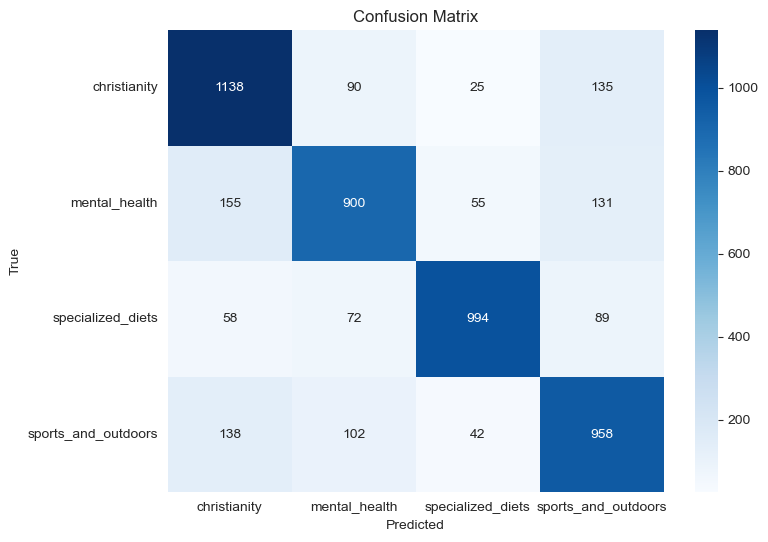

In [115]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred_probs = gru_model2_customized.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [116]:
# predictions for two data points
# Test a single sample
sample_index = 0
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = gru_model2_customized.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 230ms/step

Actual Genre: christianity
Predicted Genre: christianity


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_9912/2012956874.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


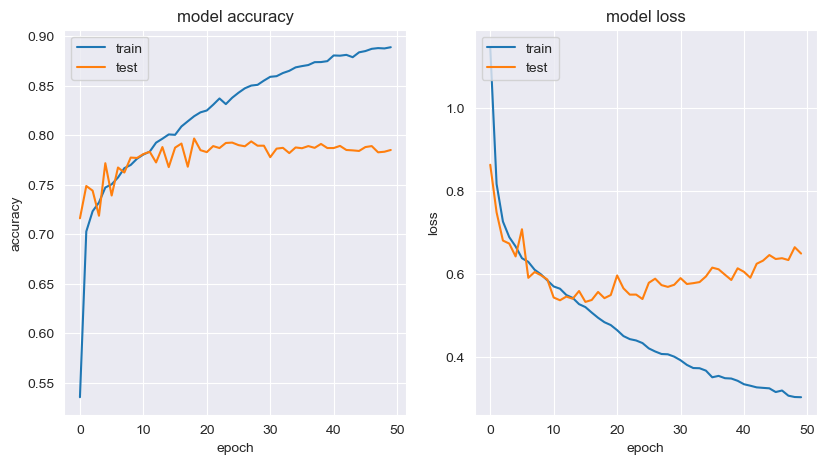

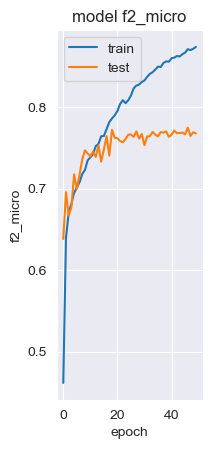

In [143]:
# combine all the history from training together
gru_combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    gru_combined[key] = np.hstack([x.history[key] for x in gru_custom2_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(gru_combined['accuracy'])
plt.plot(gru_combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(gru_combined['f2_micro'])
plt.plot(gru_combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('gru_custom2.png')
plt.show()

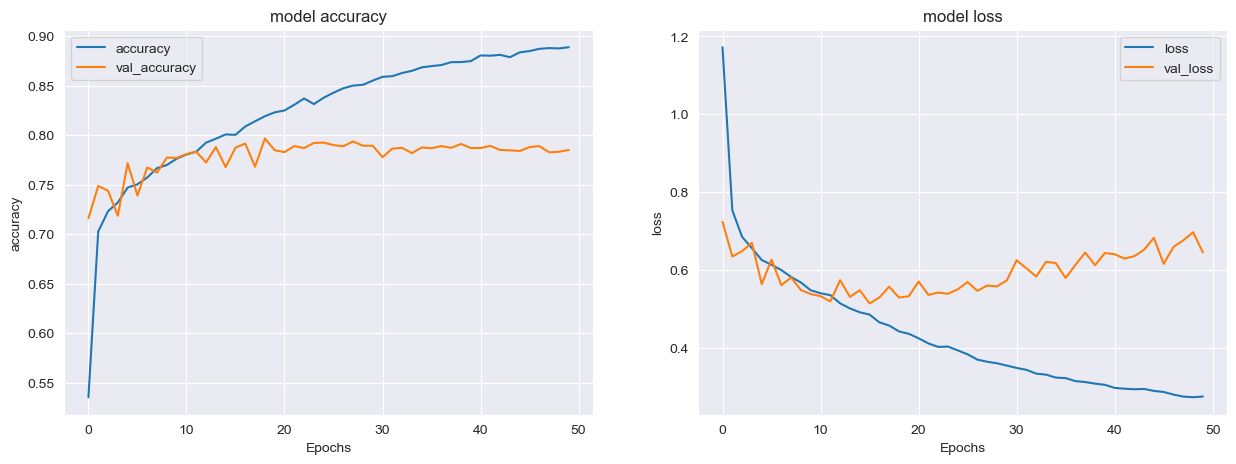

In [117]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(gru_custom2_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(gru_custom2_history[0], 'loss')

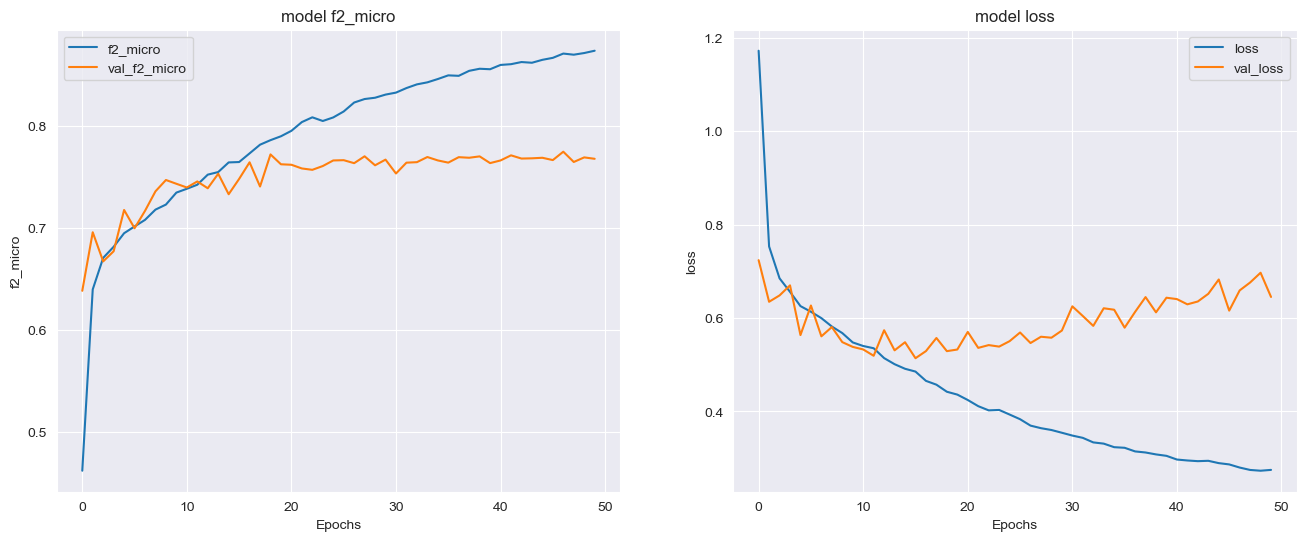

In [118]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(gru_custom2_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(gru_custom2_history[0], 'loss')

## <b>Choosing the Best Model<b>

Let's first visualize and compare the test performance of the different models using our F2 micro metric.

In [73]:
import ipyplot 
images_list = ['lstm_base.png','lstm_custom.png','lstm_custom2.png','gru_base.png','gru_custom.png','gru_custom2.png'] 
ipyplot.plot_images(images_list,max_images=30,img_width=500)

In [75]:
# converged validation f2 micro values for each of our models
data = [[base_lstm_train_f2_micro,base_lstm_val_f2_micro,base_gru_train_f2_micro,base_gru_val_f2_micro],
        [cus1_lstm_train_f2_micro,cus1_lstm_val_f2_micro,cus1_gru_train_f2_micro,cus1_gru_val_f2_micro],
        [cus2_lstm_train_f2_micro,cus2_lstm_val_f2_micro,cus2_gru_train_f2_micro,cus2_gru_val_f2_micro]]

results_df = pd.DataFrame(data, 
                          columns=['LSTM Train F2 Result','LSTM Test F2 Result','GRU Train F2 Result','GRU Test F2 Result'],
                          index=['Base','Custom Model 1','Custom Model 2'])

results_df

,LSTM Train F2 Result,LSTM Test F2 Result,GRU Train F2 Result,GRU Test F2 Result
Base,0.904,0.765,0.871,0.764
Custom Model 1,0.828,0.753,0.821,0.755
Custom Model 2,0.853,0.750,0.874,0.768


Many of our models converge to about the same number for test data. We will choose to use the base GRU model since it we will not be able to find a statistical difference between its validation F2 micro metric and the metrics from the other models that perform within the 0.76 range. Additionally, we chose this model because it performs as well as the other models while having the least number of trainable parameters and the least complexity.

##### Can We Further Increase Our Metrics by Cleansing the Data Even Further?

In [134]:
# further data cleansing

## <b>Hyper-tuning the Best Model<b>

In [133]:
# hyper-tuning goes here

## <b>Adding the Second RNN Chain<b>

##### Bidirectional Second Chain RNN Model

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization, Bidirectional, Concatenate, Embedding
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import TimeDistributed
import matplotlib.pyplot as plt

# Assuming 'max_sequence_length', 'embedding_layer', 'NUM_CLASSES', 'f2_micro', 'X_train', 'y_train', 'X_val', 'y_val' are defined
# Also, ensure that 'f2_micro' is defined before using it in metrics

embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

# Define the Sequential model
gru_chain_model = Sequential()

# Add the embedding layer to the model
gru_chain_model.add(embedding_layer)

# Add the first GRU chain
gru_chain_model.add(Bidirectional(GRU(100, dropout=0.2, return_sequences=True)))

# Add the second GRU chain taking the output of the first chain as input
gru_chain_model.add(Bidirectional(GRU(50, dropout=0.2, return_sequences=True)))

# Additional layers
gru_chain_model.add(BatchNormalization())
gru_chain_model.add(Dense(64, activation='relu'))
gru_chain_model.add(BatchNormalization())
gru_chain_model.add(Dropout(0.5))

# Output layer
output_layer = Dense(NUM_CLASSES, activation='softmax')
time_distributed = TimeDistributed(output_layer)

# Add the time-distributed layer to the model
gru_chain_model.add(time_distributed)

# Compile the model
gru_chain_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', f2_micro])

# Print model summary
print(gru_chain_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         4394000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 1000, 200)         121200    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 1000, 100)         75600     
 onal)                                                           
                                                                 
 batch_normalization_4 (Bat  (None, 1000, 100)         400       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1000, 64)          6464      
                                                      

In [112]:
%%time
import numpy as np

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))

# Train the model
gru_rnn_history = []
gru_history = [] 

# Repeat the labels for each time step
y_train_ohe_tiled = np.tile(y_train_ohe[:, np.newaxis, :], (1, XXX_train.shape[1], 1))
y_test_ohe_tiled = np.tile(y_test_ohe[:, np.newaxis, :], (1, XXX_test.shape[1], 1))

# Train the model using the modified labels
tmp = gru_chain_model.fit(XXX_train, 
                    y_train_ohe_tiled,  # Use the modified labels
                    epochs=5, 
                    batch_size=64,
                    validation_data=(XXX_test, y_test_ohe_tiled),
                    validation_split=0.2,
                    #callbacks=[early_stopping]
                   )

gru_rnn_history.append( tmp )
gru_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 21:51:03

Epoch 1/5


2023-12-12 21:51:05.942060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:06.508795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:06.528327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:06.864872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:06.895410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:07.673874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:51:07.705103: I tensorflow/core/grappler/optimizers/cust

318/318 [==============================] - ETA: 0s - loss: 1.3013 - accuracy: 0.3697 - f2_micro: 0.1704

2023-12-12 21:54:37.362487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:54:37.684744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:54:37.699653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:54:38.003324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:54:38.029039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 229s 710ms/step - loss: 1.3013 - accuracy: 0.3697 - f2_micro: 0.1704 - val_loss: 1.0654 - val_accuracy: 0.4806 - val_f2_micro: 0.2661
Epoch 2/5
318/318 [==============================] - 229s 719ms/step - loss: 0.9518 - accuracy: 0.5697 - f2_micro: 0.4309 - val_loss: 0.6404 - val_accuracy: 0.7447 - val_f2_micro: 0.6789
Epoch 3/5
318/318 [==============================] - 229s 718ms/step - loss: 0.6607 - accuracy: 0.7369 - f2_micro: 0.6795 - val_loss: 0.6941 - val_accuracy: 0.7297 - val_f2_micro: 0.7065
Epoch 4/5
318/318 [==============================] - 228s 715ms/step - loss: 0.6214 - accuracy: 0.7536 - f2_micro: 0.7004 - val_loss: 0.5776 - val_accuracy: 0.7684 - val_f2_micro: 0.7164
Epoch 5/5
318/318 [==============================] - 233s 733ms/step - loss: 0.5930 - accuracy: 0.7627 - f2_micro: 0.7148 - val_loss: 0.5398 - val_accuracy: 0.7798 - val_f2_micro: 0.7357

End date and time: 2023-12-12 22:10:11

Elapsed time: 0:19:08.311955

CPU 

Accidently re-ran the above cell after completeing 50 epochs. Completed another 5 epochs to continue on the model training.

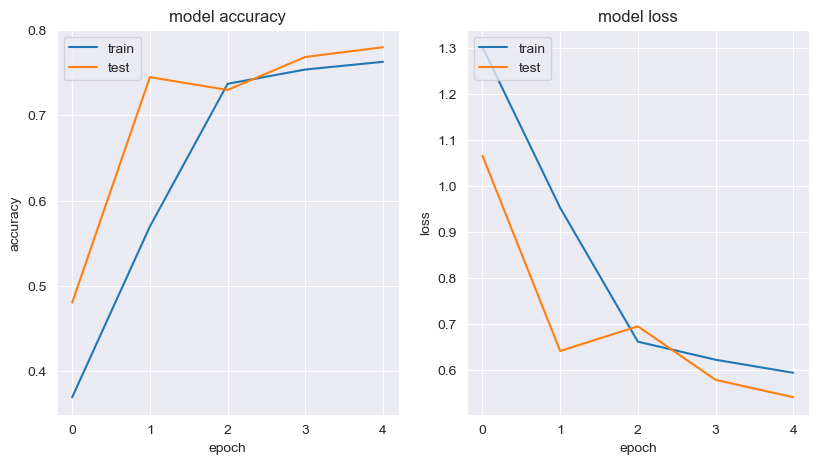

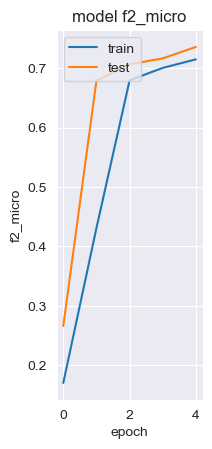

In [115]:
# combine all the history from training together
gru_combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    gru_combined[key] = np.hstack([x.history[key] for x in gru_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(gru_combined['accuracy'])
plt.plot(gru_combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(gru_combined['loss'])
plt.plot(gru_combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(gru_combined['f2_micro'])
plt.plot(gru_combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('gru_custom2.png')
plt.show()

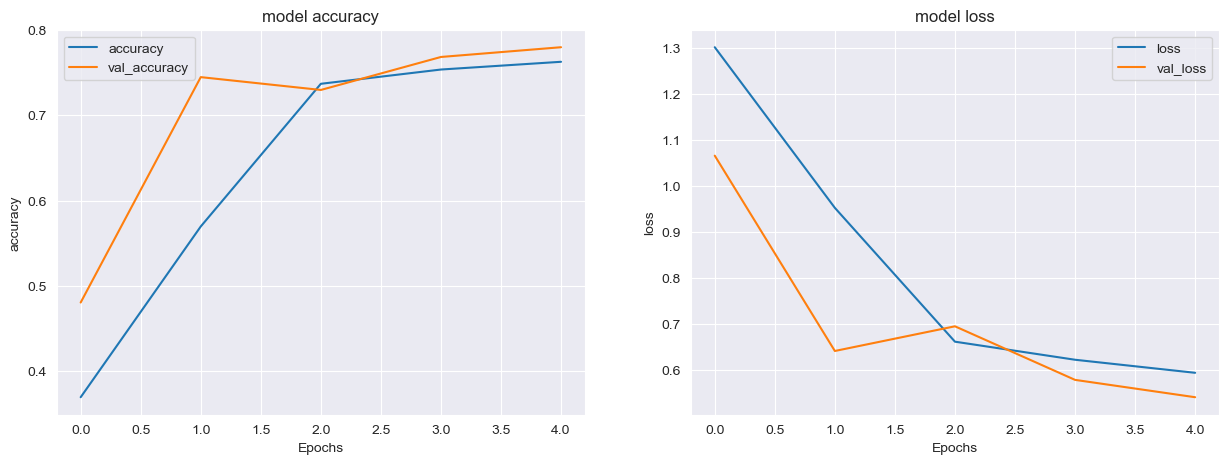

In [116]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(gru_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(gru_history[0], 'loss')

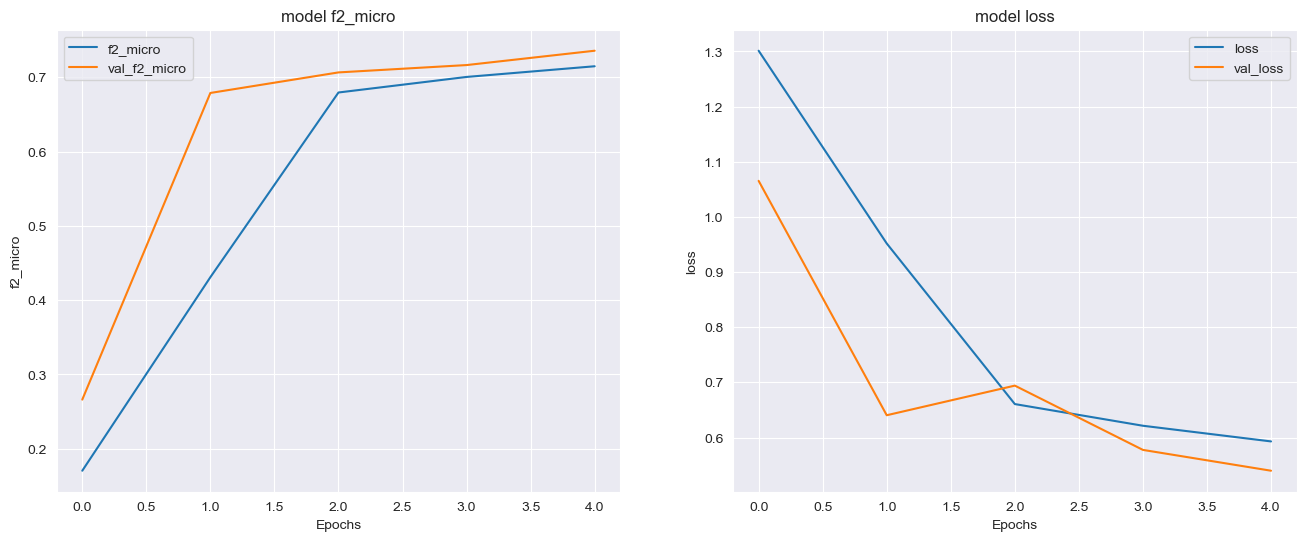

In [117]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(gru_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(gru_history[0], 'loss')

### <a href="#detailed_grading_rubric_6">LAB7 Detailed Grading Rubric</a>

### <a href="#TOC_6">TOP</a>

## <a id="multivariate_data_analysis_6">3 - Exceptional Work <b>(1 points total)</b></a> 
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Exceptional Work(<b>1 point total</b>)</h3>
    <ul>
        <li>You have free reign to provide additional analyses</li>
        <li>Research and use the ConceptNet, Numberbatch embedding and compare to GloVe. Which method is better for your specific application? </li>
        <li>(2nd GRU). Alternatively, you may also choose one recurrent network and one convolutional network. </li>
    </ul>
</div>

## <b>Simple Hybrid Architecture - RNN based on LSTM and CNN<b>

Combining a simple LSTM and a basic CNN in a hybrid model is a reasonable and common approach, especially for text classification tasks. This allows the model to capture both sequential patterns (handled well by LSTMs) and local patterns (handled well by CNNs). Starting with a simple hybrid model is a good way to establish a baseline and understand how the combination of these architectures performs on your specific task.

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dense

# Assuming you already have an embedding layer (embedding_layer) defined

hybrid_model = Sequential()
hybrid_model.add(embedding_layer)
hybrid_model.add(Conv1D(128, 5, activation='relu'))
hybrid_model.add(MaxPooling1D())
hybrid_model.add(LSTM(100, dropout = 0.2))
hybrid_model.add(Dense(NUM_CLASSES, activation='softmax'))

hybrid_model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy', f2_micro])

print(hybrid_model.summary())

2023-12-12 23:02:55.160733: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-12 23:02:55.160831: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-12 23:02:55.160854: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-12 23:02:55.161117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-12 23:02:55.161321: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         4394000   
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 498, 128)          0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 4550132 (17.36 MB)
Trainable params: 156132 (609.89 KB)
Non-trainable params: 4394000 (16.76 MB)
___________

In [96]:
%%time
now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))

# Train the model
hybrid_rnn_history = []
hybrid_history = [] 

# Fit the model
tmp = hybrid_model.fit(XXX_train,
                                  y_train_ohe,
                                  epochs=epochs,
                                  batch_size=64,
                                  validation_data=(XXX_test, y_test_ohe))

hybrid_rnn_history.append(tmp)

# Append the 'history' attribute, not the entire result
hybrid_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 21:15:36

Epoch 1/50


2023-12-12 21:15:36.980228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:15:37.229917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:15:37.449283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 0.8686 - accuracy: 0.6345 - f2_micro: 0.5180

2023-12-12 21:16:10.386855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 21:16:10.492533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 37s 112ms/step - loss: 0.8686 - accuracy: 0.6345 - f2_micro: 0.5180 - val_loss: 0.7900 - val_accuracy: 0.6869 - val_f2_micro: 0.5979
Epoch 2/50
318/318 [==============================] - 34s 108ms/step - loss: 0.6722 - accuracy: 0.7316 - f2_micro: 0.6585 - val_loss: 0.6432 - val_accuracy: 0.7485 - val_f2_micro: 0.6825
Epoch 3/50
318/318 [==============================] - 34s 108ms/step - loss: 0.6295 - accuracy: 0.7502 - f2_micro: 0.6827 - val_loss: 0.6189 - val_accuracy: 0.7568 - val_f2_micro: 0.7053
Epoch 4/50
318/318 [==============================] - 35s 109ms/step - loss: 0.6361 - accuracy: 0.7442 - f2_micro: 0.6825 - val_loss: 0.5985 - val_accuracy: 0.7611 - val_f2_micro: 0.7104
Epoch 5/50
318/318 [==============================] - 35s 109ms/step - loss: 0.5608 - accuracy: 0.7803 - f2_micro: 0.7241 - val_loss: 0.5746 - val_accuracy: 0.7743 - val_f2_micro: 0.7161
Epoch 6/50
318/318 [==============================] - 34s 108ms/step - loss:

159/159 [==============================] - 3s 20ms/step


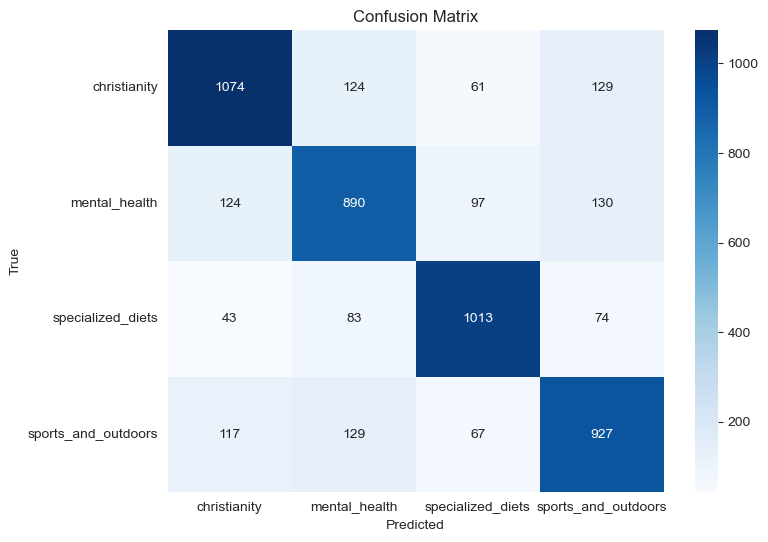

In [98]:
# heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
rounded_labels=np.argmax(y_test_ohe, axis=1)

# Evaluate the model
y_pred_probs = hybrid_model.predict(XXX_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(rounded_labels, y_pred)

# Get genre labels from label encoder
genres = label_encoder.classes_

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [101]:
# predictions for two data points
# Test a single sample
XXX_test_pd = pd.DataFrame(XXX_test)
rounded_labels_pd = pd.DataFrame(rounded_labels)

sample_index = 20
sample_text = XXX_test_pd.iloc[sample_index]
sample_label = rounded_labels_pd.iloc[sample_index]

# Tokenize and pad the input text
sample_sequence = tokenizer.texts_to_sequences([str(sample_text)])
sample_padded = pad_sequences(sample_sequence, maxlen=MAX_ART_LEN, padding='post', truncating='post')

# Predict the genre
sample_pred_probs = hybrid_model.predict(sample_padded)
sample_pred_label = np.argmax(sample_pred_probs, axis=1)[0]

# Display results
print(f"\nActual Genre: {genres[int(sample_label)]}")
print(f"Predicted Genre: {genres[sample_pred_label]}")
#print(sample_text)

1/1 [==============================] - 0s 22ms/step

Actual Genre: specialized_diets
Predicted Genre: specialized_diets


/var/folders/9n/vw61dv0j4hd5zmxxq9vv99kr0000gn/T/ipykernel_14846/3809305049.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nActual Genre: {genres[int(sample_label)]}")


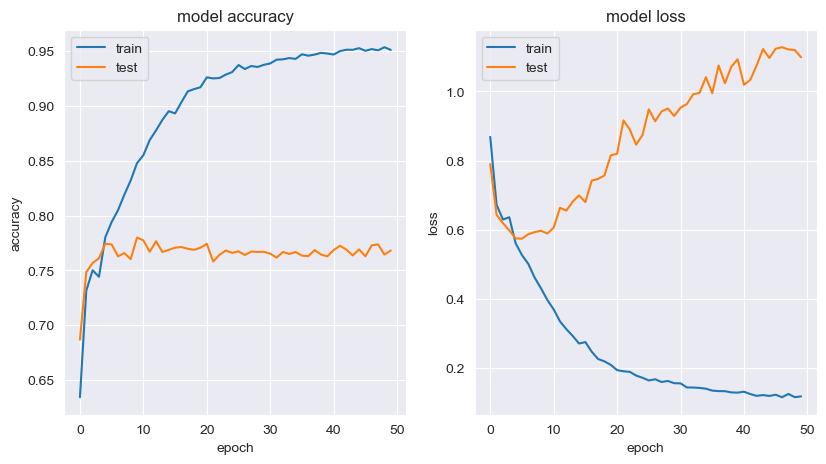

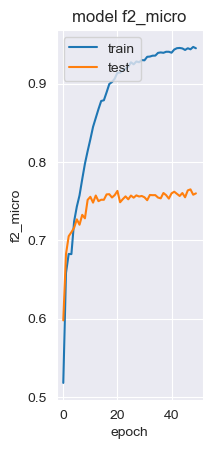

In [103]:
gru_combined = dict()
for key in ['accuracy','val_accuracy','loss','val_loss', 'f2_micro', 'val_f2_micro']:
    gru_combined[key] = np.hstack([x.history[key] for x in hybrid_rnn_history])
    
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(gru_combined['accuracy'])
plt.plot(gru_combined['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(132)
plt.plot(gru_combined['loss'])
plt.plot(gru_combined['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f2_micro
plt.subplot(133)
plt.plot(gru_combined['f2_micro'])
plt.plot(gru_combined['val_f2_micro'])
plt.title('model f2_micro')
plt.ylabel('f2_micro')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('gru_custom2.png')
plt.show()

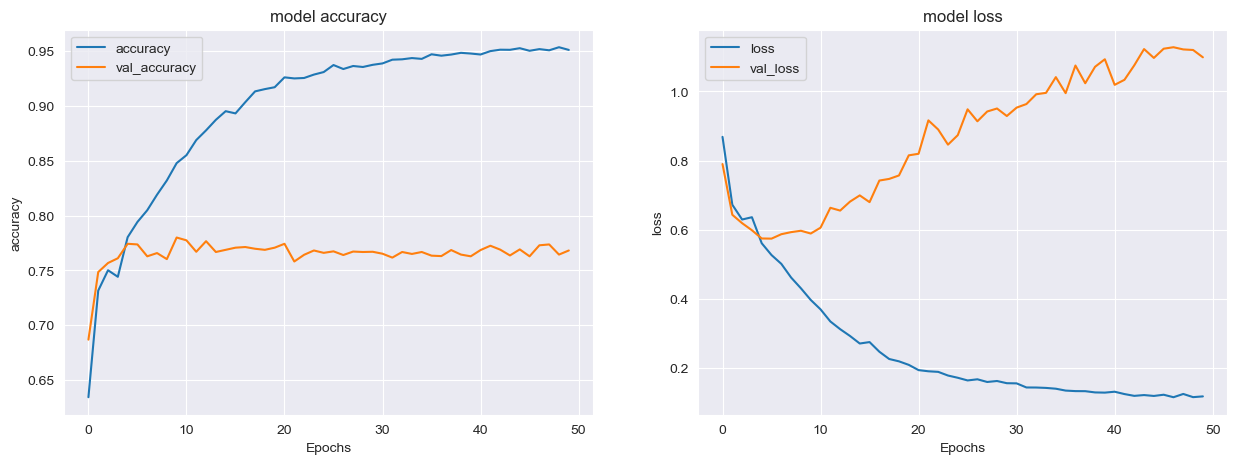

In [106]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_graphs(hybrid_history[0], 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(hybrid_history[0], 'loss')

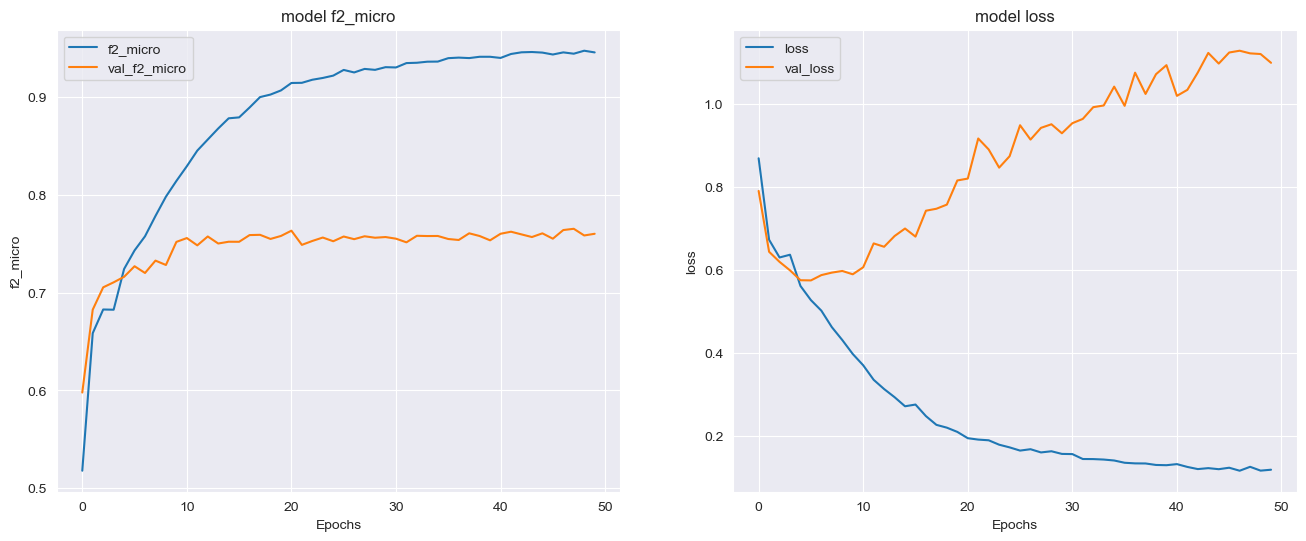

In [107]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(hybrid_history[0], 'f2_micro')
plt.subplot(1, 2, 2)
plot_graphs(hybrid_history[0], 'loss')

## <b>Conceptnet Numberbatch Pre-trained Embedding<b>

##### About ConceptNet Numberbatch:
According to the Numberbatch GitBub page (https://github.com/commonsense/conceptnet-numberbatch), like Glove, ConceptNet Numberbatch is a pretrained word embedding. Each word embedding is a semantic vector which can be used as a starting point for machine learning models to embed text data (see our earlier section on embedding layers). Numberbatch is a part of the open data project ConceptNet. 



##### How Does it Compare to GloVe:
Numberbatch was built using previous pretrained word embeddings such as GloVe and others. Additionally, Numberbatch is not only based on one language. Numberbatch is a multilingual word embedding capitalizing on how words in different languages sgare semantic space. Furthermore, Numberbatch functions on a graph style knowledge from ConceptNet. 

According to the Numberbatch GitHub page, Numberbatch outperforms traditional word embeddings like GloVe. Numberbatch also is evaluated on an out-of-vocabulary basis meaning that it is evaluated on its performance with unfamiliar words.

In [75]:
!head "numberbatch-en.txt" 

516782 300
## 0.0295 -0.0405 -0.0341 0.0837 -0.0575 0.0482 -0.0145 0.0019 0.0347 0.0825 -0.0735 0.0083 -0.0944 -0.0717 0.1994 -0.0107 -0.0783 0.0693 -0.0161 0.0460 0.1713 0.0727 -0.0983 -0.0641 -0.0124 0.0140 -0.0473 0.1162 0.1127 -0.0739 -0.0666 -0.0631 -0.0196 -0.0709 -0.0302 -0.1179 0.0618 0.0519 0.0121 0.0056 0.0765 0.0083 0.0142 -0.0883 0.0255 -0.0015 0.0748 -0.0214 -0.1229 -0.0017 -0.0317 0.0062 0.0191 0.1199 0.0969 0.0471 -0.0436 0.0068 -0.0418 0.0152 0.0222 -0.1094 -0.0128 -0.0608 0.0089 -0.0595 0.1440 -0.0798 0.0247 -0.0462 0.1096 0.0880 -0.0120 -0.0788 -0.0957 -0.0101 -0.0441 0.0881 -0.0223 0.1191 0.0082 0.0629 -0.1335 0.0780 -0.1300 0.1064 0.0998 0.0302 0.0443 0.0002 -0.0337 0.0083 0.0378 0.0339 -0.0844 0.0284 0.0447 0.0143 -0.0790 -0.0271 0.0984 -0.0505 -0.0347 0.0482 0.1245 -0.0699 -0.0189 0.0133 -0.1199 0.0381 0.0186 0.0643 0.0098 -0.0836 -0.0570 0.1068 0.0021 -0.0158 -0.0168 0.0517 -0.0612 -0.0437 0.0889 -0.0229 0.0609 0.0851 -0.0162 0.0017 -0.1132 0.0150 0.0997 -0.0834 

In [76]:
# ConceptNet Numberbatch Implementation
EMBED_SIZE = 300
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('numberbatch-en.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 516783 word vectors.
Embedding Shape: (43940, 300) 
 Total words found: 32212 
 Percentage: 73.30905780609923


In [77]:
embedding_layer_cn = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [78]:
# Define the model
gru_cn_model = Sequential()
gru_cn_model.add(embedding_layer_cn)
gru_cn_model.add(GRU(300, dropout=0.2))
gru_cn_model.add(Dense(NUM_CLASSES, activation='softmax')) # assuming you have 4 genres

# Compile the model
gru_cn_model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', f2_micro])

# Print model summary
print(gru_cn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         13182000  
                                                                 
 gru (GRU)                   (None, 300)               541800    
                                                                 
 dense_1 (Dense)             (None, 4)                 1204      
                                                                 
Total params: 13725004 (52.36 MB)
Trainable params: 543004 (2.07 MB)
Non-trainable params: 13182000 (50.29 MB)
_________________________________________________________________
None


Run will run 10 epochs since the training time taks much longer with an embedding size of 300.

In [79]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))

# Train the model
gru_cn_history = []
gru_history = [] 
tmp = gru_cn_model.fit(XXX_train, 
              y_train_ohe, 
              epochs=10, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              #validation_split=0.2,
              #callbacks=[early_stopping])
             )
gru_cn_history.append(tmp)

# Append the 'history' attribute, not the entire result
gru_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 23:07:13

Epoch 1/10


2023-12-12 23:07:14.937286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:07:15.630711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:07:16.886858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.5621 - f2_micro: 0.3467

2023-12-12 23:11:55.088561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:11:55.198193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 298s 926ms/step - loss: 1.0910 - accuracy: 0.5621 - f2_micro: 0.3467 - val_loss: 0.7180 - val_accuracy: 0.7192 - val_f2_micro: 0.6181
Epoch 2/10
318/318 [==============================] - 291s 916ms/step - loss: 0.7489 - accuracy: 0.7177 - f2_micro: 0.6445 - val_loss: 0.5799 - val_accuracy: 0.7745 - val_f2_micro: 0.7046
Epoch 3/10
318/318 [==============================] - 238s 747ms/step - loss: 0.6429 - accuracy: 0.7480 - f2_micro: 0.6928 - val_loss: 0.5869 - val_accuracy: 0.7727 - val_f2_micro: 0.6993
Epoch 4/10
318/318 [==============================] - 178s 558ms/step - loss: 0.5892 - accuracy: 0.7665 - f2_micro: 0.7133 - val_loss: 0.5587 - val_accuracy: 0.7747 - val_f2_micro: 0.7206
Epoch 5/10
318/318 [==============================] - 175s 552ms/step - loss: 0.5632 - accuracy: 0.7749 - f2_micro: 0.7275 - val_loss: 0.5194 - val_accuracy: 0.7883 - val_f2_micro: 0.7366
Epoch 6/10
318/318 [==============================] - 177s 555ms/step -

In [80]:
# ConceptNet Numberbatch Implementation
EMBED_SIZE = 300
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('glove/glove.6B.300d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (43940, 300) 
 Total words found: 34241 
 Percentage: 77.92671825216203


In [81]:
embedding_layer_300 = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

In [82]:
# Define the model
gru_300_model = Sequential()
gru_300_model.add(embedding_layer_300)
gru_300_model.add(GRU(300, dropout=0.2))
gru_300_model.add(Dense(NUM_CLASSES, activation='softmax')) # assuming you have 4 genres

# Compile the model
gru_300_model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', f2_micro])

# Print model summary
print(gru_300_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 300)         13182000  
                                                                 
 gru_1 (GRU)                 (None, 300)               541800    
                                                                 
 dense_2 (Dense)             (None, 4)                 1204      
                                                                 
Total params: 13725004 (52.36 MB)
Trainable params: 543004 (2.07 MB)
Non-trainable params: 13182000 (50.29 MB)
_________________________________________________________________
None


In [83]:
%%time

now = datetime.datetime.now()
print("\nCurrent date and time: {}\n".format(now.strftime("%Y-%m-%d %H:%M:%S")))

# Train the model
gru_300_history = []
gru_history = [] 
tmp = gru_300_model.fit(XXX_train, 
              y_train_ohe, 
              epochs=10, 
              batch_size=64,
              validation_data=(XXX_test, y_test_ohe),
              #validation_split=0.2,
              #callbacks=[early_stopping])
             )
gru_300_history.append(tmp)

# Append the 'history' attribute, not the entire result
gru_history.append(tmp.history)

diff = (datetime.datetime.now() - now)
now = datetime.datetime.now()
print("\nEnd date and time: {}".format(now.strftime("%Y-%m-%d %H:%M:%S")))
print("\nElapsed time: {}\n".format(diff))


Current date and time: 2023-12-12 23:42:26

Epoch 1/10


2023-12-12 23:42:26.976189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:42:27.221533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:42:27.513798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 0.8428 - accuracy: 0.6524 - f2_micro: 0.5559

2023-12-12 23:45:18.133562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-12 23:45:18.238659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 181s 564ms/step - loss: 0.8428 - accuracy: 0.6524 - f2_micro: 0.5559 - val_loss: 0.6652 - val_accuracy: 0.7405 - val_f2_micro: 0.6875
Epoch 2/10
318/318 [==============================] - 176s 552ms/step - loss: 0.5933 - accuracy: 0.7591 - f2_micro: 0.7085 - val_loss: 0.5413 - val_accuracy: 0.7814 - val_f2_micro: 0.7337
Epoch 3/10
318/318 [==============================] - 175s 550ms/step - loss: 0.5435 - accuracy: 0.7824 - f2_micro: 0.7328 - val_loss: 0.5530 - val_accuracy: 0.7743 - val_f2_micro: 0.7386
Epoch 4/10
318/318 [==============================] - 177s 555ms/step - loss: 0.5126 - accuracy: 0.7936 - f2_micro: 0.7493 - val_loss: 0.5192 - val_accuracy: 0.7871 - val_f2_micro: 0.7438
Epoch 5/10
318/318 [==============================] - 178s 558ms/step - loss: 0.4699 - accuracy: 0.8100 - f2_micro: 0.7687 - val_loss: 0.4968 - val_accuracy: 0.7959 - val_f2_micro: 0.7598
Epoch 6/10
318/318 [==============================] - 177s 555ms/step -

##### Performance Comparison Between ConceptNet Numberbatch and GloVe:
One interesting result from the Conceptnet Numberbatch evaluation metrics is how it does not overfit the data like most of our other models do. Actually, at times Conceptnet Numberbatch can underfit the training data. As for the comparison with our GloVe pre-trained embedding layer, the two perform about the same. It is hard to say which performs the best since their validation f2 metric scores are so similar.

## <b>Last Findings<b>

We found that, surprisingly, our hybrid CNN-RNN model had the best performance with a validation F2 score of   0.7809. As we previously mentioned, hybrid CNN-RNN models capture sequential and local patterns. This makes hybrid models a reasonable and common approach for text classification.